# Data analysis of all metrics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from dython.nominal import associations, identify_nominal_columns

In [4]:
current_dir = os.getcwd()
path_to_data = os.path.abspath(os.path.join(current_dir, '..', 'data', 'merged_data',
                                            'css_project_metrics.tsv'))

In [5]:
df = pd.read_csv(path_to_data, sep='\t', low_memory=False)

# EDA

##### Initial EDA and correlation heatmap for numeric variables

In [6]:
df.describe()

,start,end,gene_len,gene_len_500,RS_value,RS_500_value,phast_value,phast_500_value,phylo_value,phylo_500_value,...,DRC150_signif_snp_count,oe_lof_upper,pLI,mis_z,GO_BP_Count,GO_MF_Count,n_interactions,median_expr_all_tissues,max_expr_all_tissues,num_tissues_at_least_5_TPM
count,5.778300e+04,5.778300e+04,5.778300e+04,5.778300e+04,57783.000000,57783.000000,57688.000000,57736.000000,57688.000000,57736.000000,...,57783.000000,19216.000000,1.921600e+04,19716.000000,17867.000000,17867.000000,19671.000000,46933.000000,46933.000000,46933.000000
mean,7.445067e+07,7.448060e+07,2.992727e+04,3.092727e+04,-0.078424,-0.131719,0.136227,0.110686,0.440720,0.254927,...,0.005901,0.951812,2.449113e-01,0.757280,7.522472,3.822634,120.372681,8.840986,97.079090,12.464726
std,5.560791e+07,5.561041e+07,8.712114e+04,8.712114e+04,0.430195,0.321619,0.126192,0.078866,0.826451,0.439708,...,0.165621,0.529669,3.806252e-01,1.339091,10.599134,3.248340,239.821079,54.040826,1615.863976,20.329316
min,4.960000e+03,5.048000e+03,8.000000e+00,1.008000e+03,-2.722213,-2.022088,0.000000,0.000076,-2.228534,-1.688088,...,0.000000,0.030000,1.860500e-164,-18.875000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,3.048878e+07,3.051554e+07,4.730000e+02,1.473000e+03,-0.263515,-0.283485,0.053766,0.057325,-0.013640,-0.004348,...,0.000000,0.499000,1.005525e-07,0.017441,2.000000,2.000000,11.000000,0.000000,0.150491,0.000000
50%,6.064295e+07,6.067645e+07,2.791000e+03,3.791000e+03,-0.101914,-0.131109,0.088572,0.086639,0.125848,0.120953,...,0.000000,0.911000,2.323900e-03,0.616670,4.000000,3.000000,47.000000,0.053680,2.842740,0.000000
75%,1.097520e+08,1.097840e+08,2.262700e+04,2.362700e+04,0.000000,-0.013859,0.174376,0.141360,0.485256,0.372067,...,0.000000,1.352000,4.232175e-01,1.428900,9.000000,5.000000,137.000000,2.965790,32.494400,17.000000
max,2.492308e+08,2.492312e+08,2.304638e+06,2.305638e+06,3.932742,2.978528,0.867623,0.588403,6.937403,4.255759,...,17.000000,1.996000,1.000000e+00,10.967000,176.000000,39.000000,5974.000000,3518.645000,267405.000000,56.000000


Correlation heatmap

In [11]:
df_num = df[['gene_len_500', 'RS_500_value', 'phast_500_value', 'phylo_500_value', 'oe_lof_upper', 'pLI', 'mis_z',
           'iHS_GBR_max_500', 'DRC150', 'SDS',  'GO_BP_Count', 'GO_MF_Count', 'n_interactions', 
           'median_expr_all_tissues', 'max_expr_all_tissues', 'num_tissues_at_least_5_TPM']]

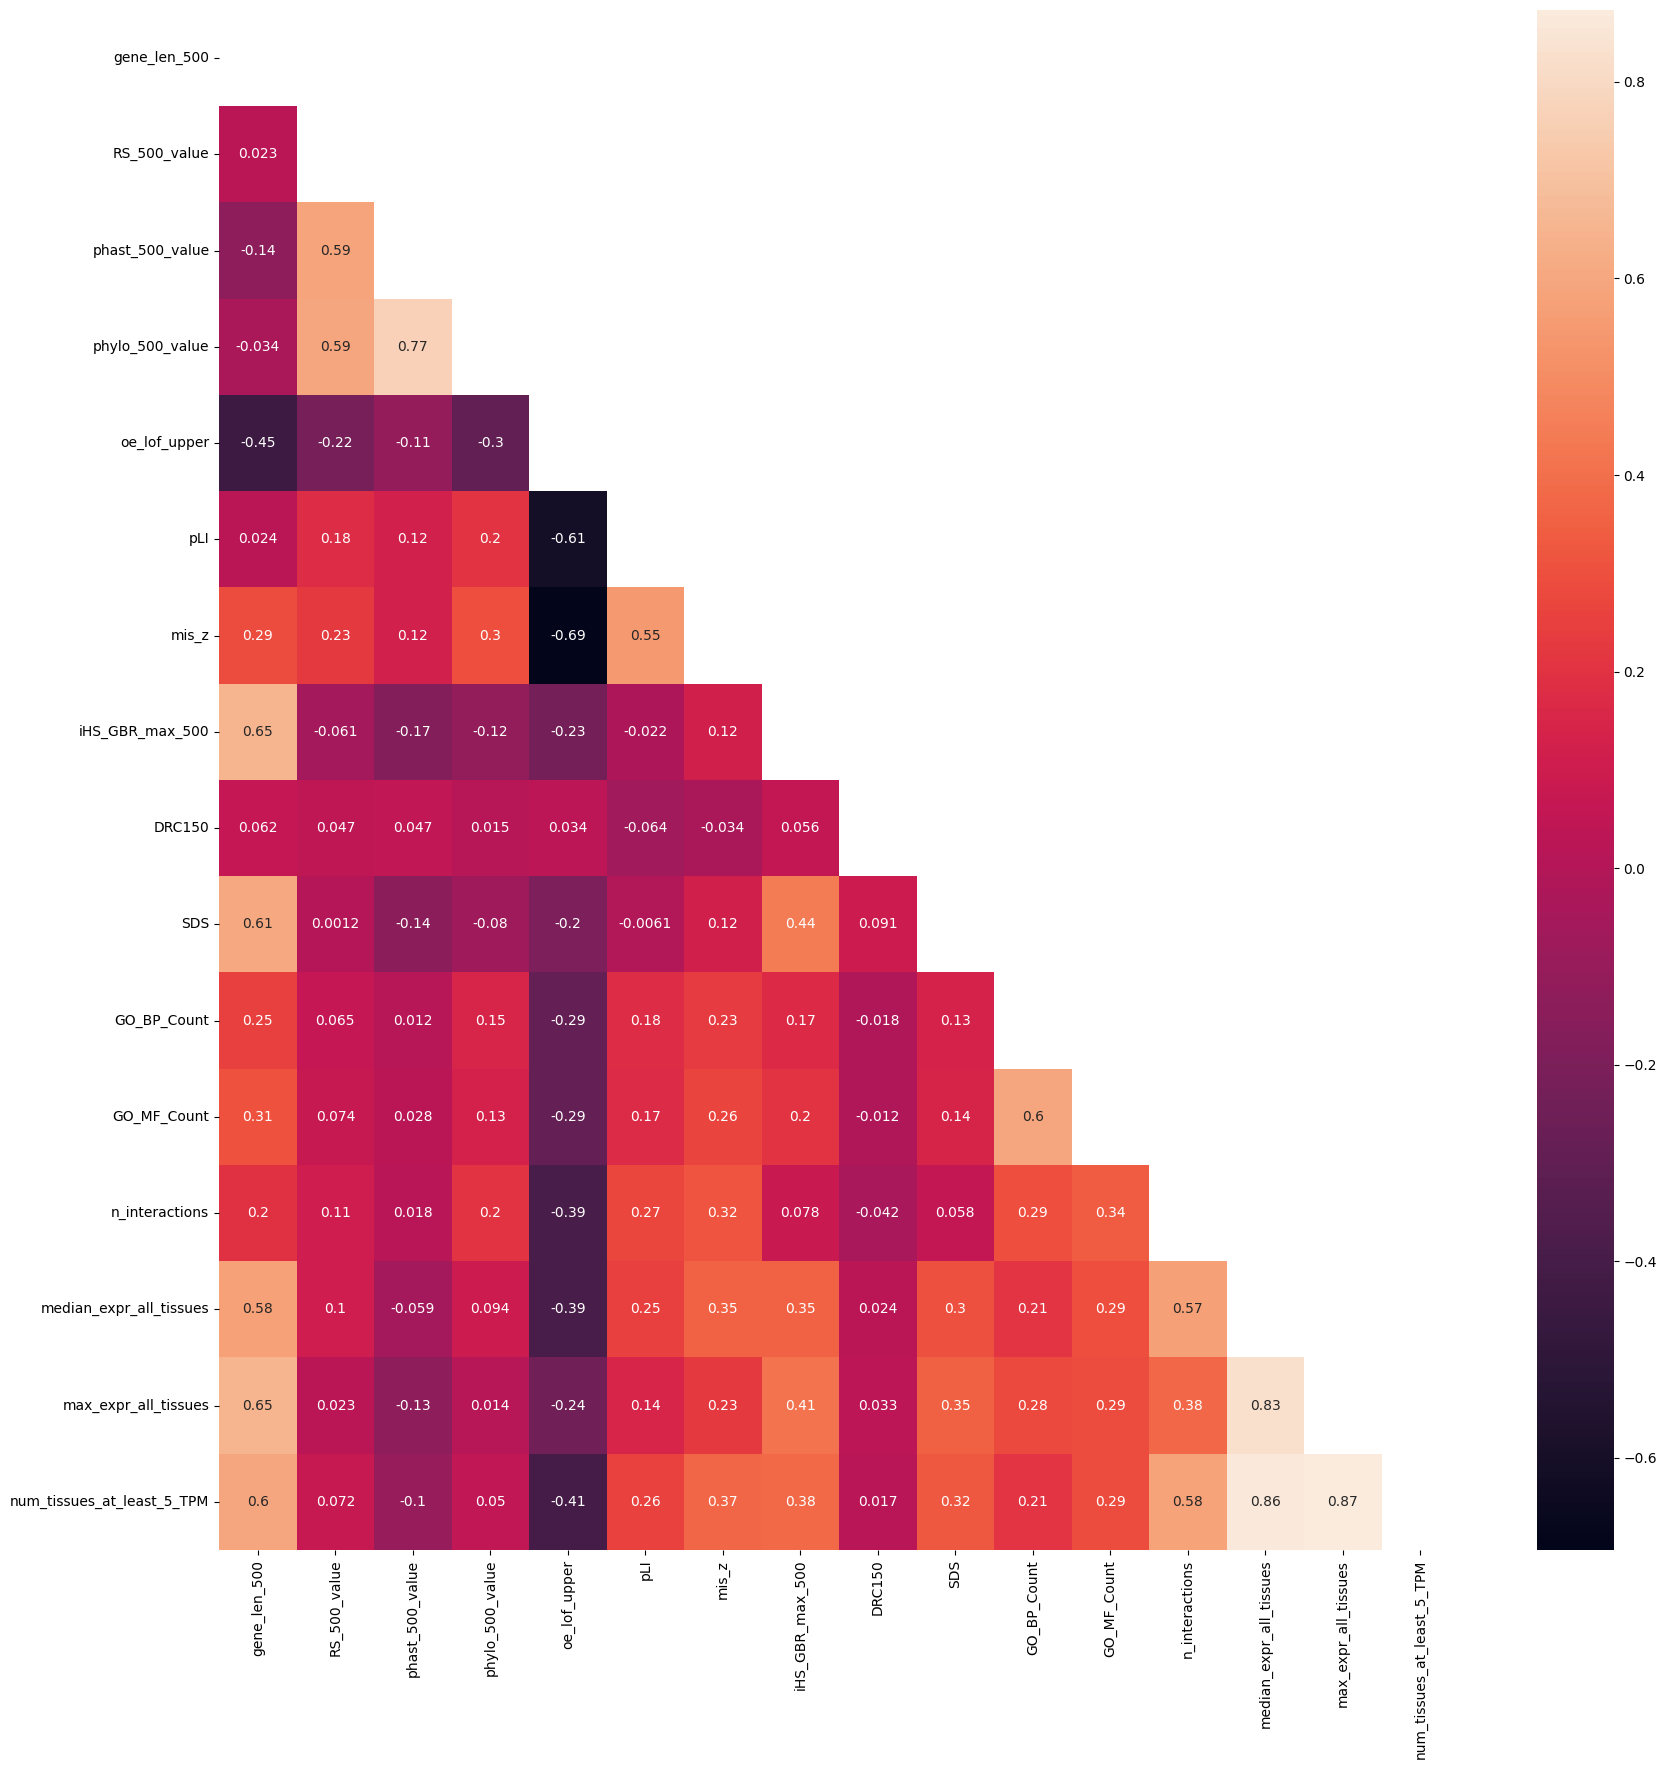

In [14]:
#heatmap for numeric values

spearmann_corr = df_num.corr(method='spearman')

# creating mask
mask = np.triu(np.ones_like(spearmann_corr))

# plotting a triangle correlation heatmap
plt.figure(figsize=(20, 20))
dataplot = sns.heatmap(spearmann_corr, annot=True, mask=mask)

# displaying heatmap
plt.show()

C:\Users\LOLpm\AppData\Local\Temp\ipykernel_7296\311982505.py:12: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  correlations[c][r] = sp[0]
C:\Users\LOLpm\AppData\Local\Temp\ipykernel_7296\311982505.py:13: FutureWarning: ChainedAssignmentErro

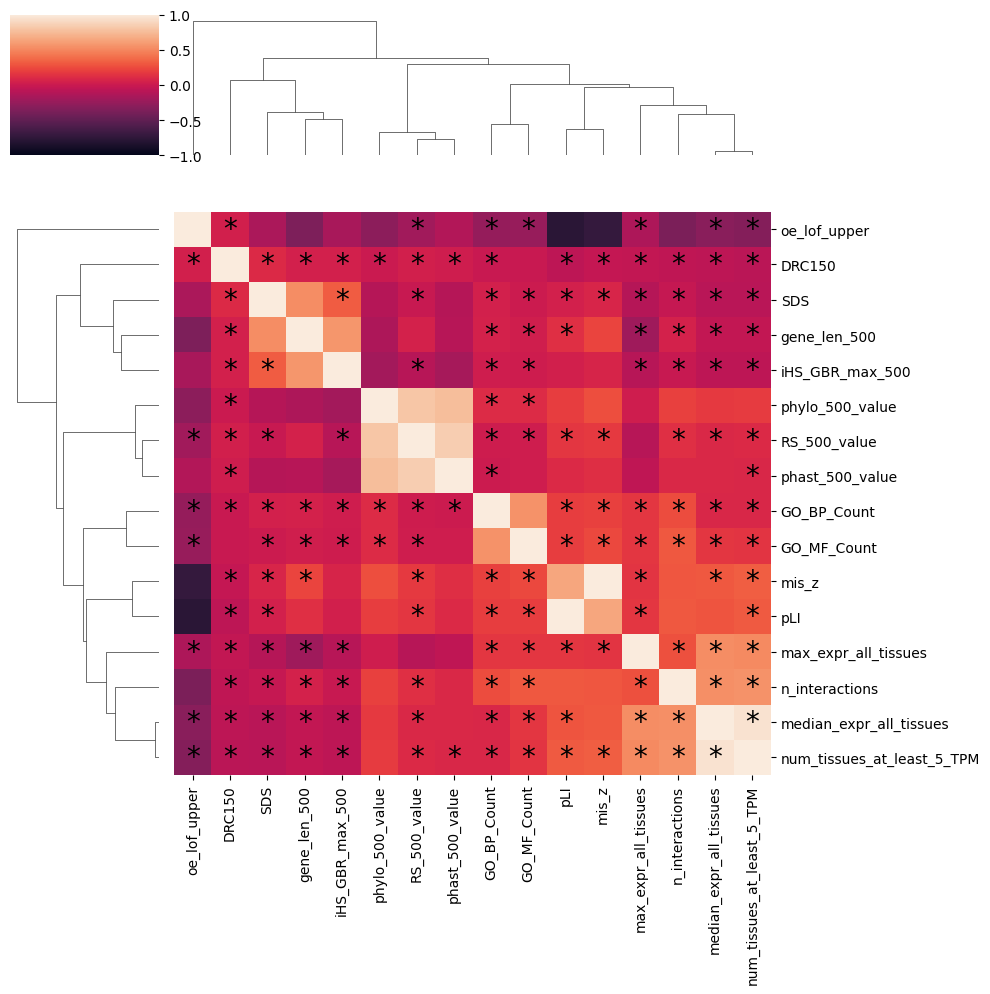

In [23]:
from scipy.stats import spearmanr
from statsmodels.stats.multitest import multipletests

def get_correlations(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how="outer")
    correlations = dfcols.transpose().join(dfcols, how="outer")
    for ix, r in enumerate(df.columns):
        for jx, c in enumerate(df.columns):
            sp = spearmanr(df[r], df[c])
            correlations[c][r] = sp[0]
            pvalues[c][r] = sp[1] if ix > jx else np.nan  # Only store values below the diagonal
    return correlations.astype("float"), pvalues.astype("float")


correlations, uncorrected_p_values = get_correlations(df_num)

# Correct p-values for multiple testing and check significance (True if the corrected p-value < 0.05)
shape = uncorrected_p_values.values.shape
significant_matrix = multipletests(uncorrected_p_values.values.flatten())[0].reshape(
    shape
)

# Here we start plotting
g = sns.clustermap(correlations, vmin=-1, vmax=1)

# Here labels on the y-axis are rotated
for tick in g.ax_heatmap.get_yticklabels():
    tick.set_rotation(0)

# Here we add asterisks onto cells with signficant correlations
for i, ix in enumerate(g.dendrogram_row.reordered_ind):
    for j, jx in enumerate(g.dendrogram_row.reordered_ind):
        if i != j:
            text = g.ax_heatmap.text(
                j + 0.5,
                i + 0.5,
                "*" if significant_matrix[ix, jx] or significant_matrix[jx, ix] else "",
                ha="center",
                va="center",
                color="black",
            )
            text.set_fontsize(20)

# Save a high-res copy of the image to disk
plt.tight_layout()
#plt.savefig("clustermap.png", dpi=200)

##### Plot for numeric variables by chr

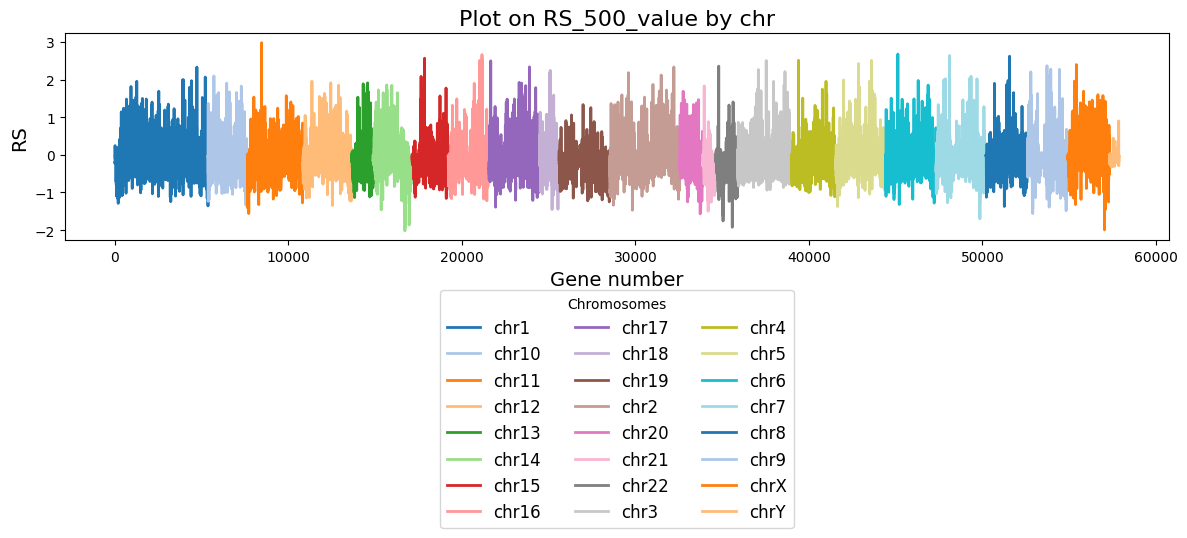

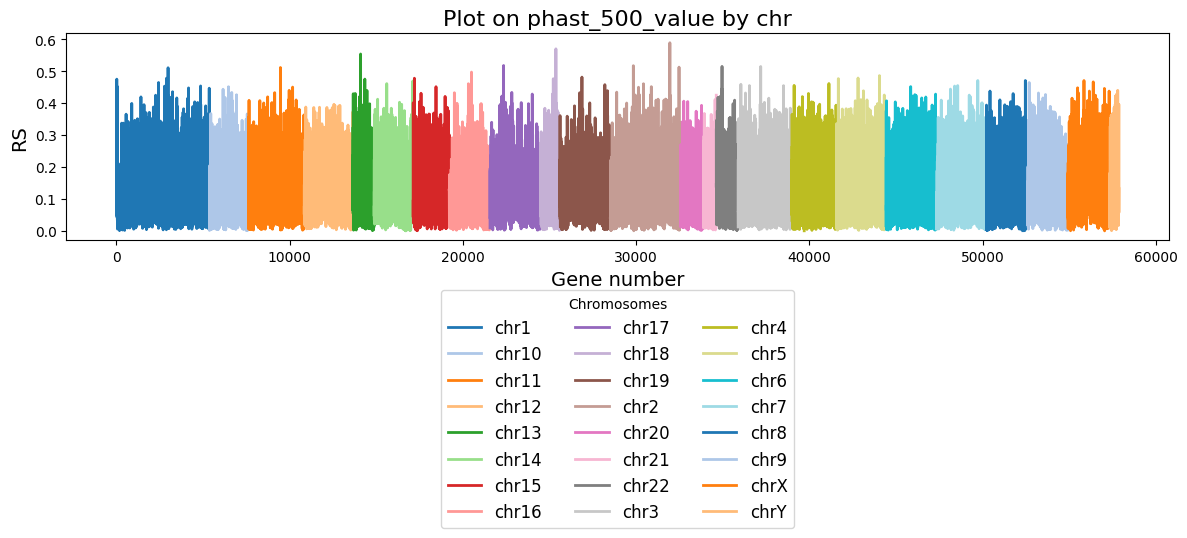

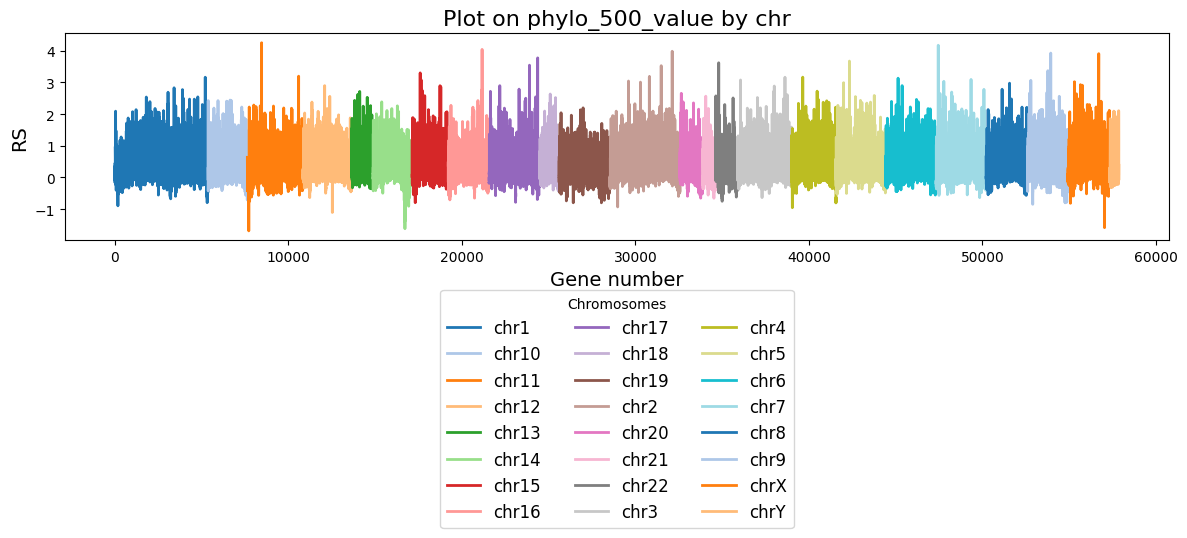

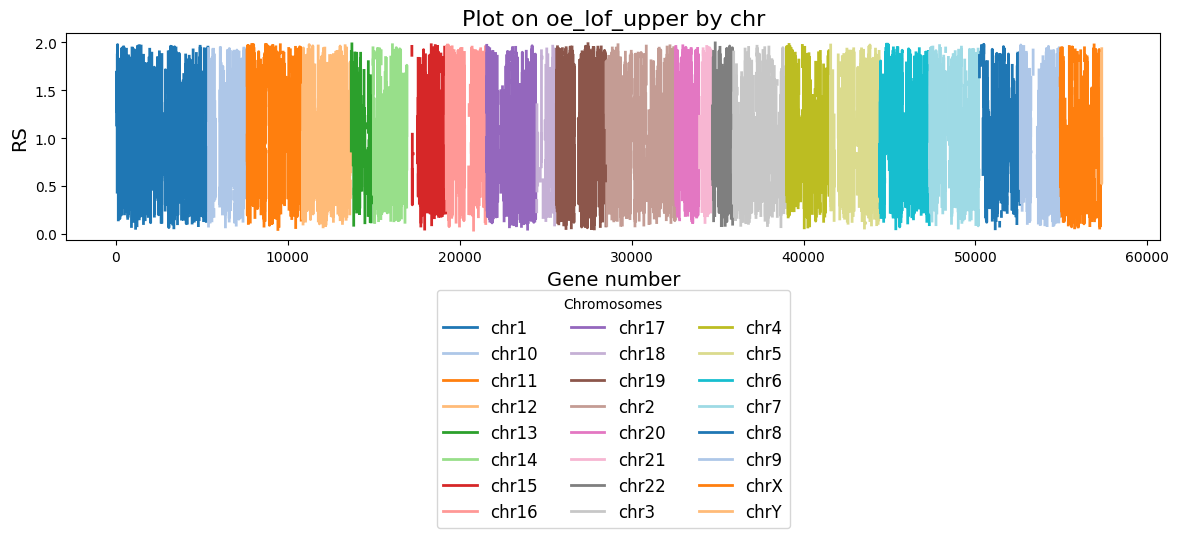

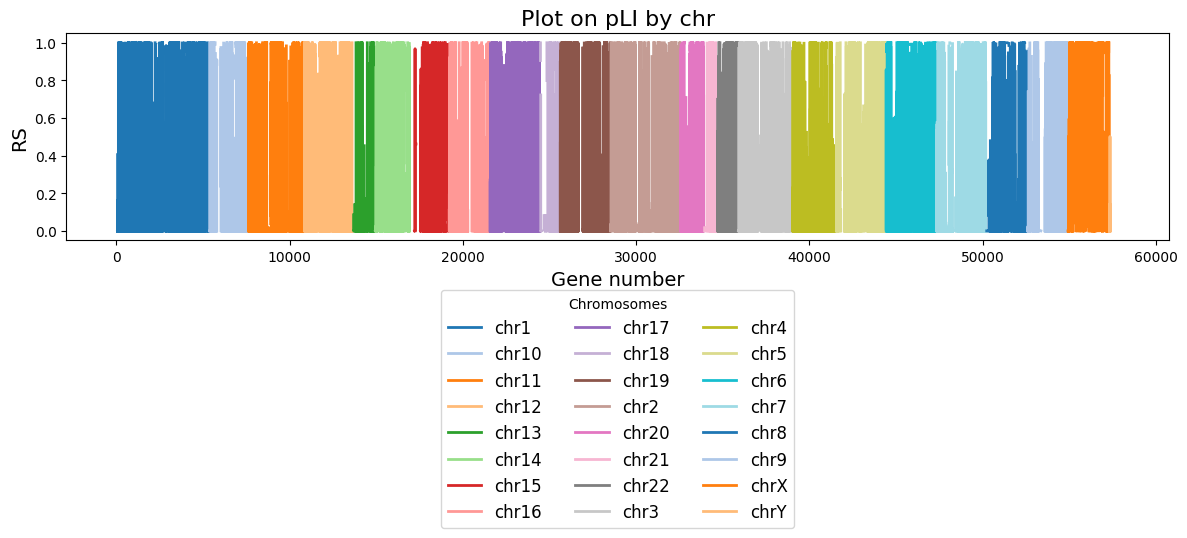

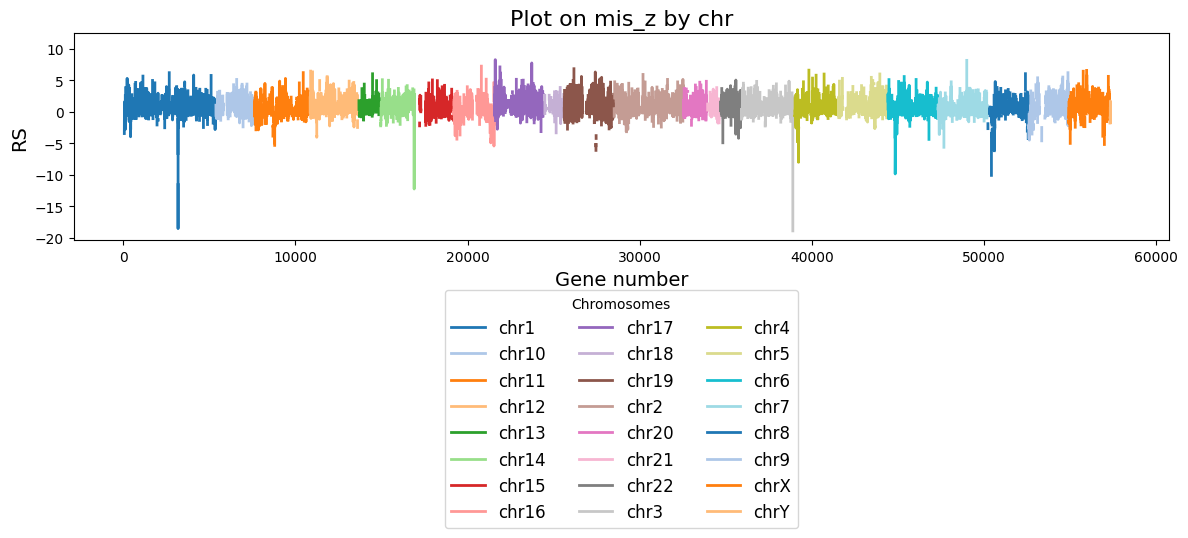

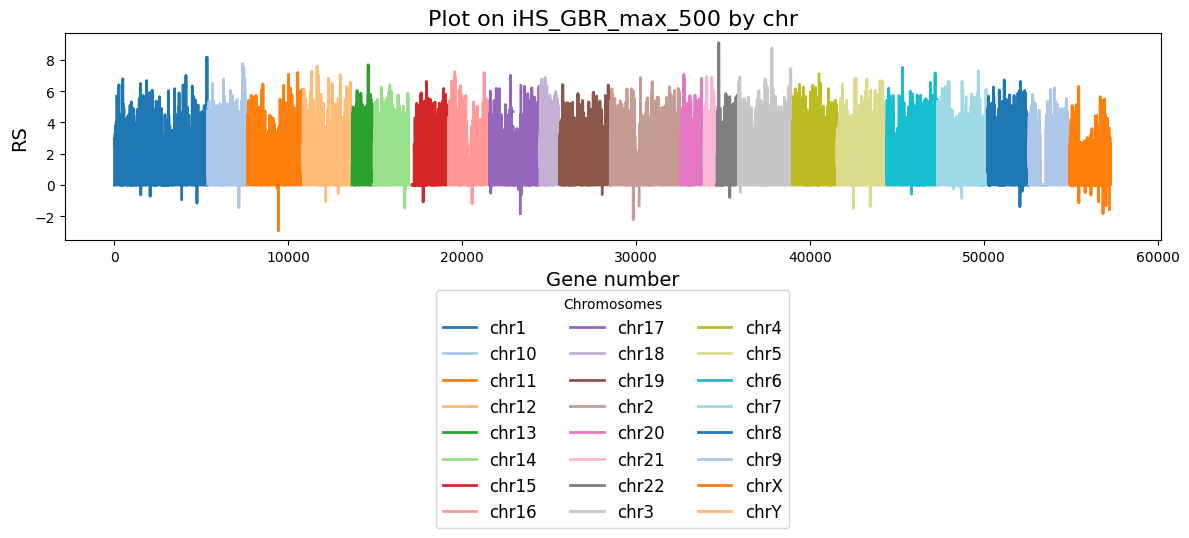

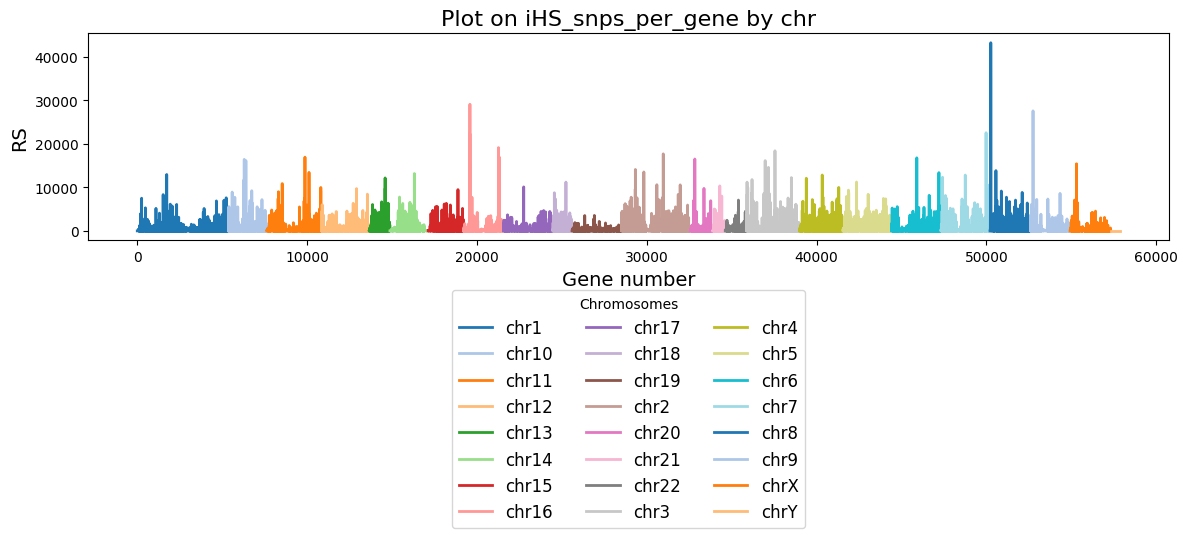

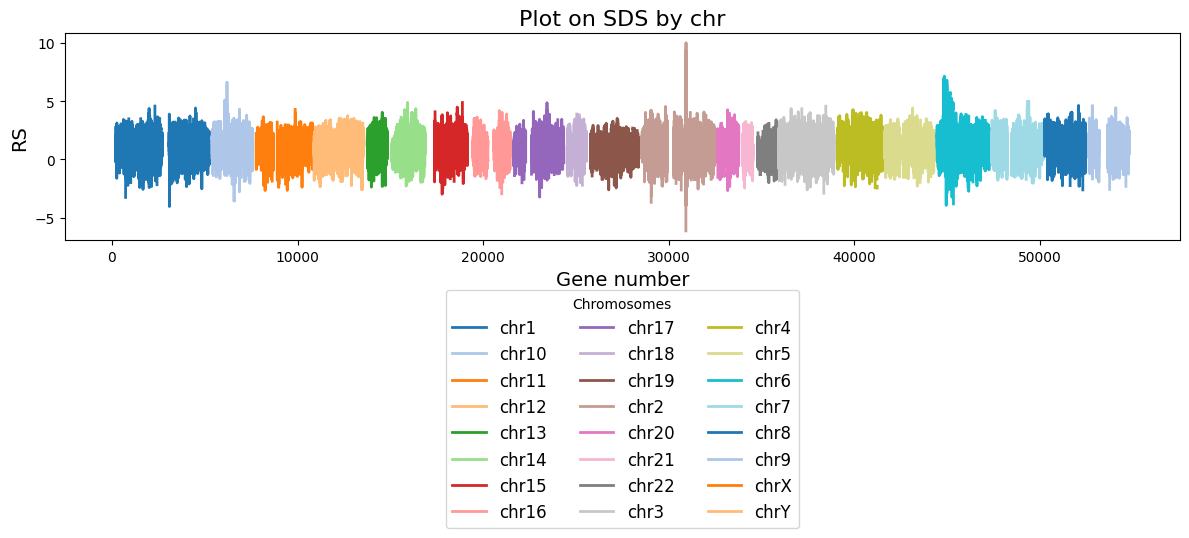

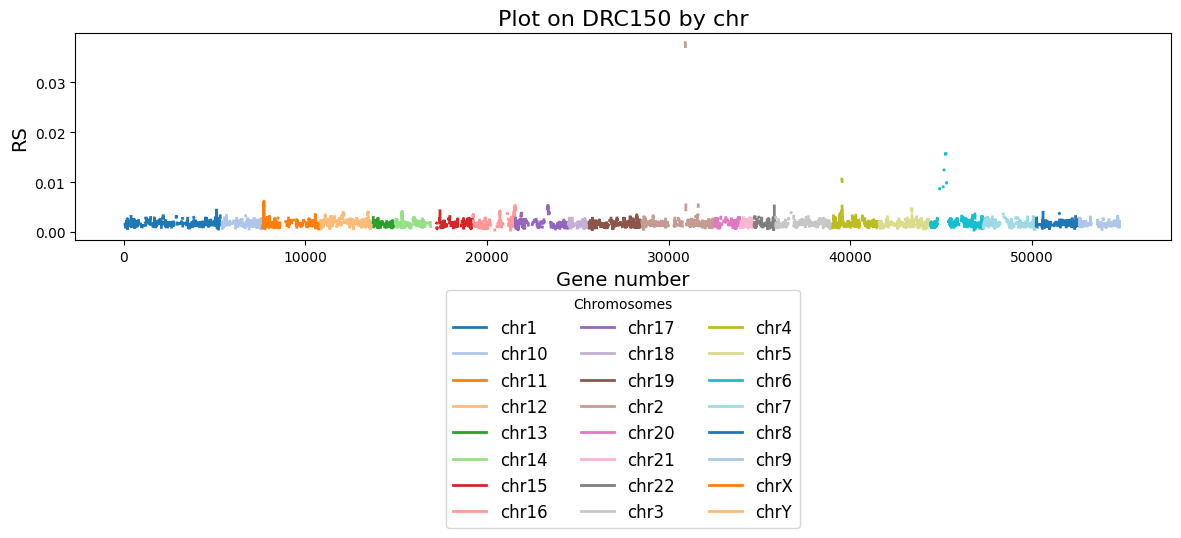

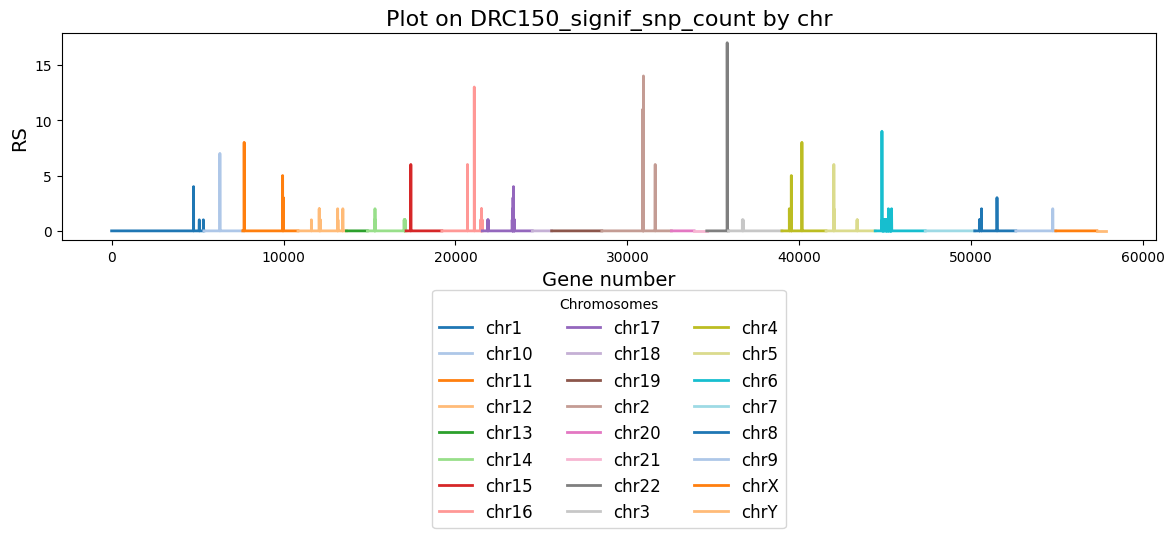

In [8]:
metrics = ['RS_500_value', 'phast_500_value', 'phylo_500_value',
    'oe_lof_upper', 'pLI', 'mis_z',
    'iHS_GBR_max_500', 'iHS_snps_per_gene', 'SDS', 'DRC150', 'DRC150_signif_snp_count']

path_to_plots = os.path.join(current_dir, '..', 'data', 'plots_by_chr')
os.makedirs(path_to_plots, exist_ok=True)

for metric in metrics:
    plt.figure(figsize=(12, 6))

    chromosomes = df['chr'].unique()
    colors = sns.color_palette("tab20", len(chromosomes))

    for idx, chrom in enumerate(chromosomes):
        chrom_data = df[df['chr'] == chrom]
        plt.plot(chrom_data[metric], label=f'{chrom}', color=colors[idx], linewidth=2)
        
    name = f'{str(metric).replace(" ", "_")}__by_chr.png'  
    output = os.path.join(path_to_plots, name)

    plt.title(f'Plot on {metric} by chr', fontsize=16)
    plt.xlabel('Gene number', fontsize=14)
    plt.ylabel('RS', fontsize=14)
    plt.legend(title='Chromosomes', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, fontsize=12)
    plt.tight_layout()
    plt.savefig(output, dpi=300, bbox_inches='tight')  
    plt.show()

In [ ]:
metrics = ['RS_value', 'RS_500_value', 'phast_value', 'phast_500_value', 
           'phylo_value', 'phylo_500_value', 'iHS_daf_500', 'iHS_std_500',
           'oe_lof_upper', 'pLI', 'mis_z']

path_to_boxplots = os.path.join(current_dir, '..', 'data', 'distribution_plots')
os.makedirs(path_to_boxplots, exist_ok=True)

for metric in metrics:
    plt.figure(figsize=(24, 12))  
    sns.boxplot(x='chr', y=metric, data=pc, palette="Set2")
    
    name = f'{str(metric).replace(" ", "_")}__by_chr.png'  
    output = os.path.join(path_to_boxplots, name)

    plt.title(f'Boxplot on {metric} by chr')
    plt.xticks(rotation=90)  
    plt.tight_layout() 
    plt.savefig(output, dpi=300, bbox_inches='tight')  
    plt.show() 

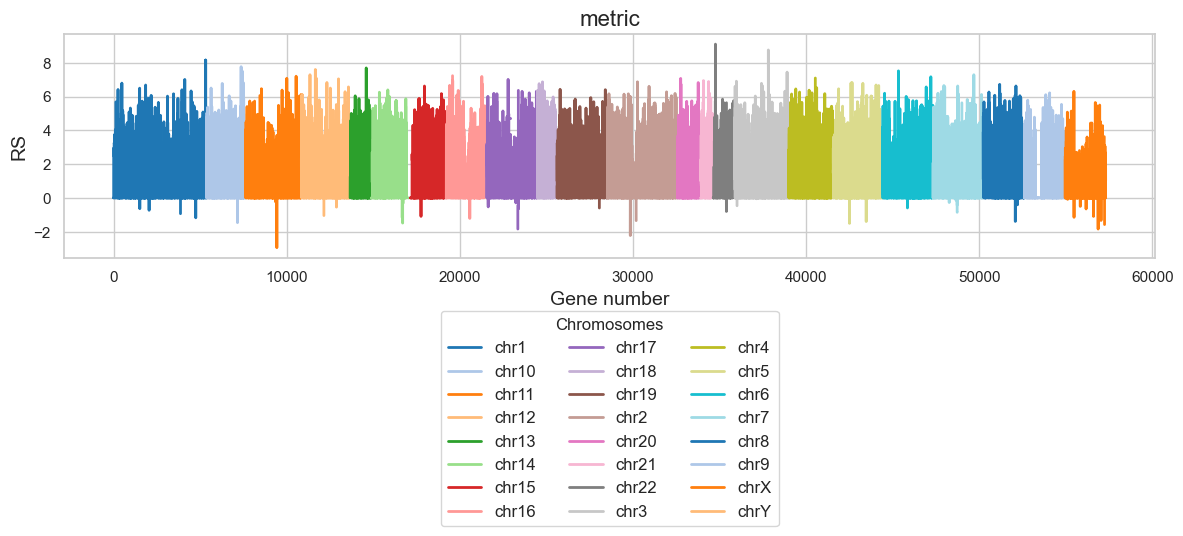

In [10]:
#example on RS metrics
plt.figure(figsize=(12, 6))

chromosomes = df['chr'].unique()
colors = sns.color_palette("tab20", len(chromosomes))

for idx, chrom in enumerate(chromosomes):
    chrom_data = df[df['chr'] == chrom]
    plt.plot(chrom_data['RS_500_value'], label=f'{chrom}', color=colors[idx], linewidth=2)

plt.title('Metric RS', fontsize=16)
plt.xlabel('Gene number', fontsize=14)
plt.ylabel('RS', fontsize=14)
plt.legend(title='Chromosomes', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, fontsize=12)
plt.tight_layout()
plt.show()

In [38]:
pc = df[df['gene_type'] == 'protein_coding']

Index(['chr', 'start', 'end', 'gene_name', 'gene_type', 'gene_len', 'RS_value',
       'RS_500_value', 'phast_value', 'phast_500_value', 'phylo_value',
       'phylo_500_value', 'iHS_GBR_max_500', 'iHS_snps_per_gene',
       'oe_lof_upper', 'pLI', 'mis_z', 'expected_snp', 'expected_snp_counts',
       'delta_iHS_snps'],
      dtype='object')

In [39]:
pc_num = pc[['gene_len', 'RS_500_value', 'phast_500_value', 'phylo_500_value', 
                  'iHS_GBR_max_500', 'iHS_snps_per_gene', 'oe_lof_upper', 'pLI', 'mis_z']]

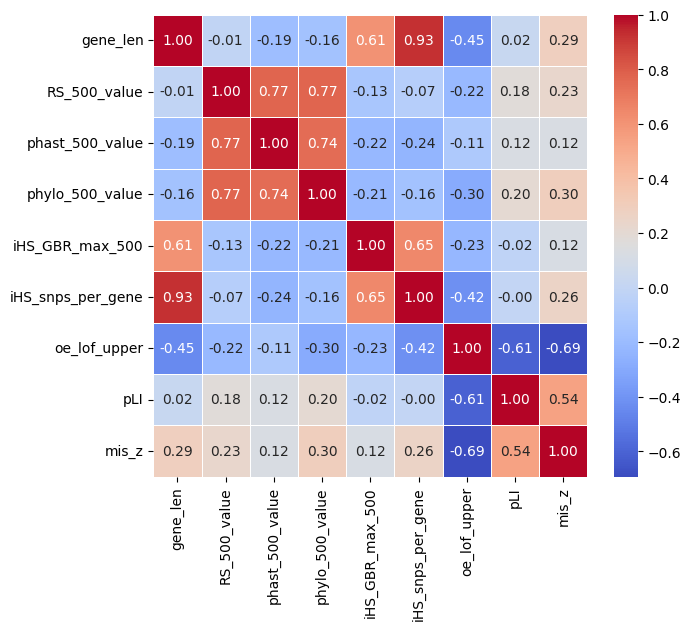

In [7]:
corr_matrix = pc_num.corr(method='spearman')
plt.figure(figsize=(7, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
#plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Correlation heatmap for categorical variable `gene_type` in all dataframe

In [ ]:
categorical_features = identify_nominal_columns(df)
print(f'CATEGORICAL DATA: {categorical_features}\n')

CATEGORICAL DATA: ['chr', 'gene_name', 'gene_type']



C:\Users\LOLpm\AppData\Local\Temp\ipykernel_7852\1305540848.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['gene_type'] = df_1['gene_type'].astype('category')


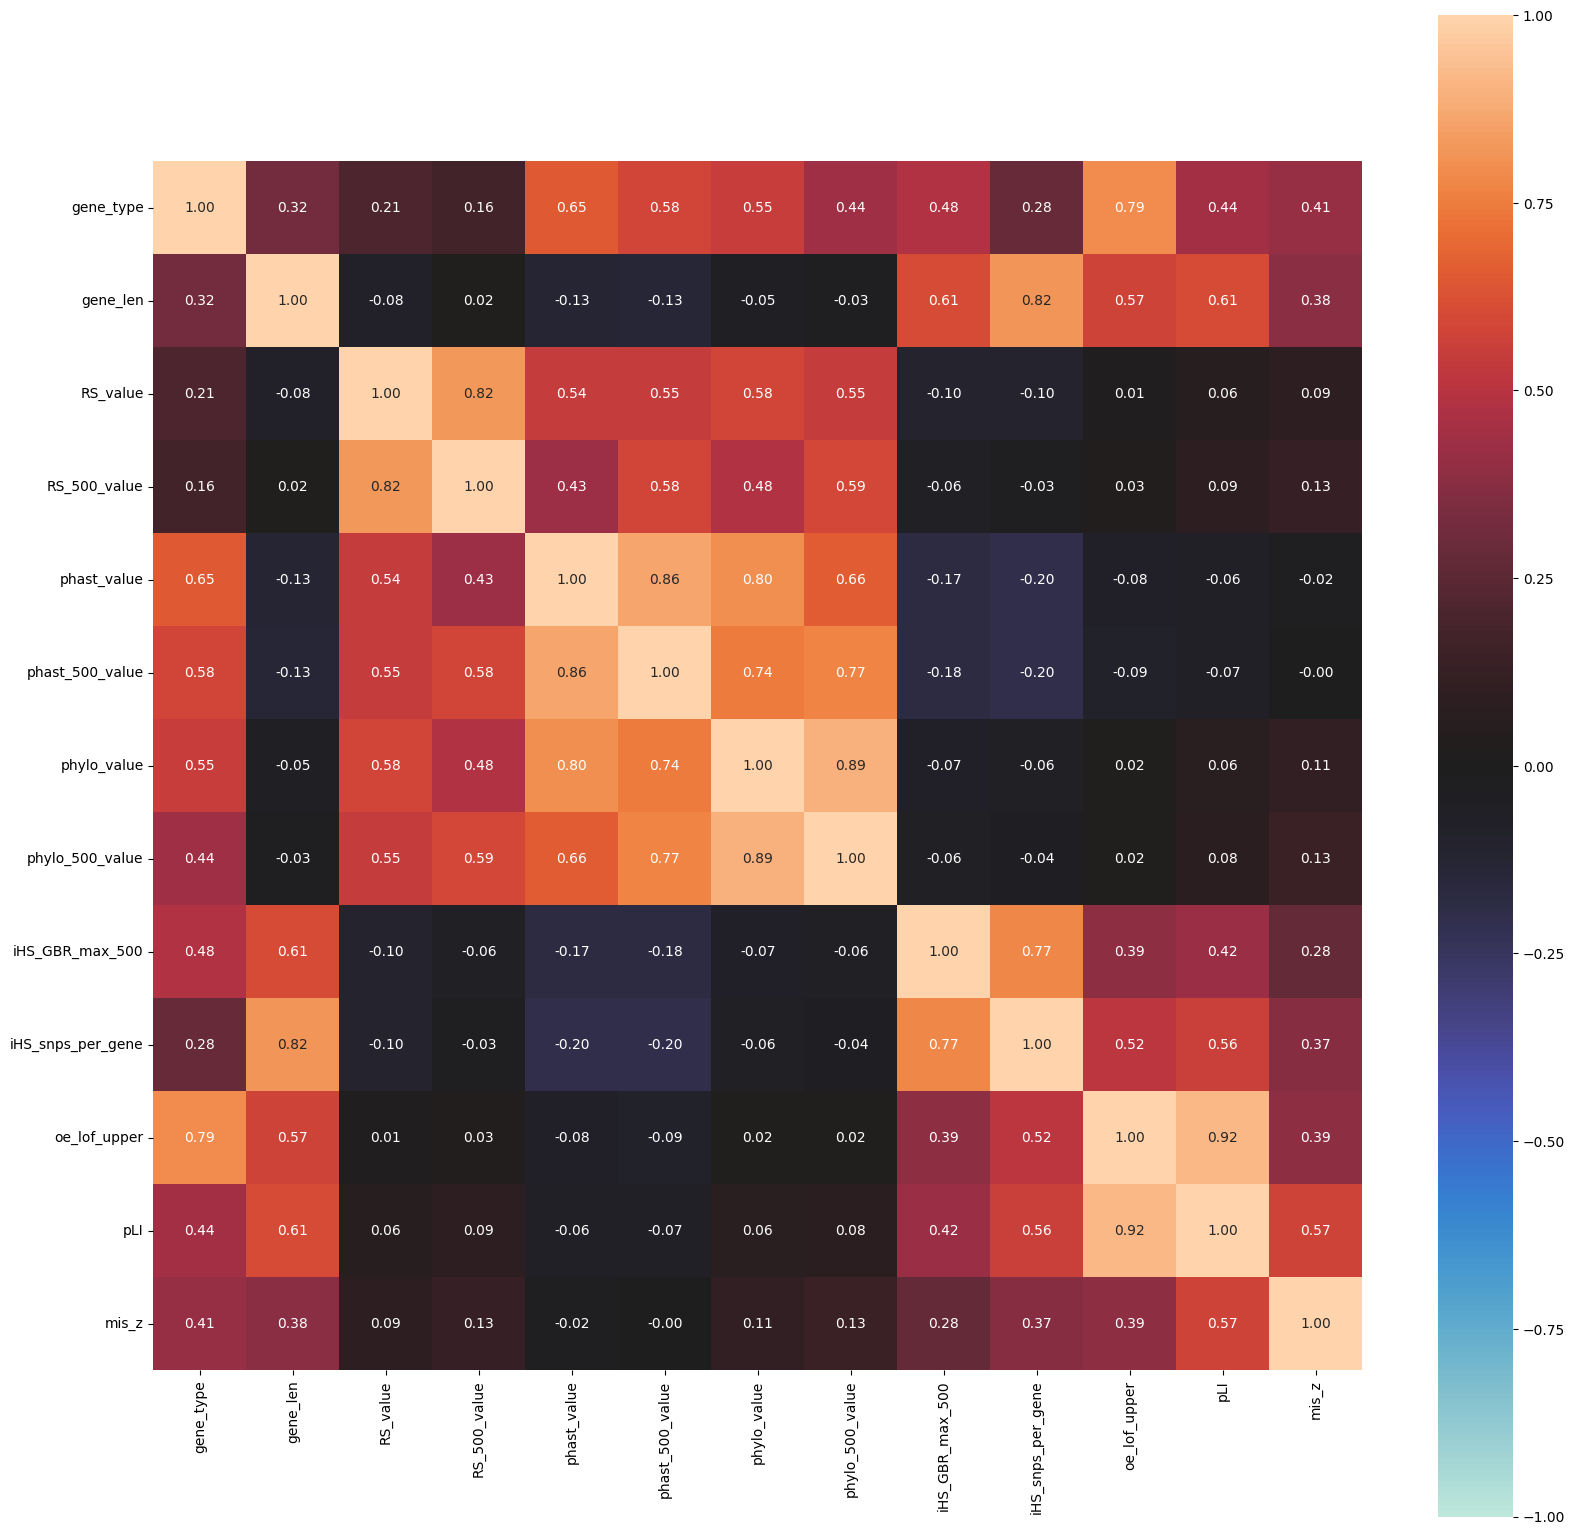

{'corr':                    gene_type  gene_len  RS_value  RS_500_value  phast_value  \
 gene_type           1.000000  0.319446  0.209115      0.164954     0.648905   
 gene_len            0.319446  1.000000 -0.084886      0.022446    -0.132483   
 RS_value            0.209115 -0.084886  1.000000      0.821268     0.540763   
 RS_500_value        0.164954  0.022446  0.821268      1.000000     0.427236   
 phast_value         0.648905 -0.132483  0.540763      0.427236     1.000000   
 phast_500_value     0.580378 -0.133861  0.546384      0.583397     0.862300   
 phylo_value         0.551512 -0.048998  0.584859      0.478803     0.802041   
 phylo_500_value     0.436476 -0.032724  0.545304      0.591987     0.662205   
 iHS_GBR_max_500     0.482559  0.605134 -0.104974     -0.056396    -0.173526   
 iHS_snps_per_gene   0.281737  0.815486 -0.102331     -0.032831    -0.195588   
 oe_lof_upper        0.790437  0.571559  0.008874      0.029765    -0.077092   
 pLI                 0.444834  0

In [12]:
df_1 = df[['gene_type', 'gene_len', 'RS_value',
       'RS_500_value', 'phast_value', 'phast_500_value', 'phylo_value',
       'phylo_500_value', 'iHS_GBR_max_500', 'iHS_snps_per_gene', 'oe_lof_upper', 'pLI', 'mis_z']]

df_1['gene_type'] = df_1['gene_type'].astype('category')

#convert to numeric
numerical_columns = ['gene_len', 'RS_value', 'RS_500_value', 'phast_value', 'phast_500_value', 
                     'phylo_value', 'phylo_500_value', 'iHS_GBR_max_500', 'iHS_snps_per_gene', 'oe_lof_upper', 'pLI', 'mis_z']

df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric)

#plot corr
associations(df_1, nominal_columns=['gene_type'], num_num_assoc='spearman')

# Distribution plots on metrcics by chr

C:\Users\LOLpm\AppData\Local\Temp\ipykernel_7852\957095972.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='chr', y=metric, data=df, palette="Set2")


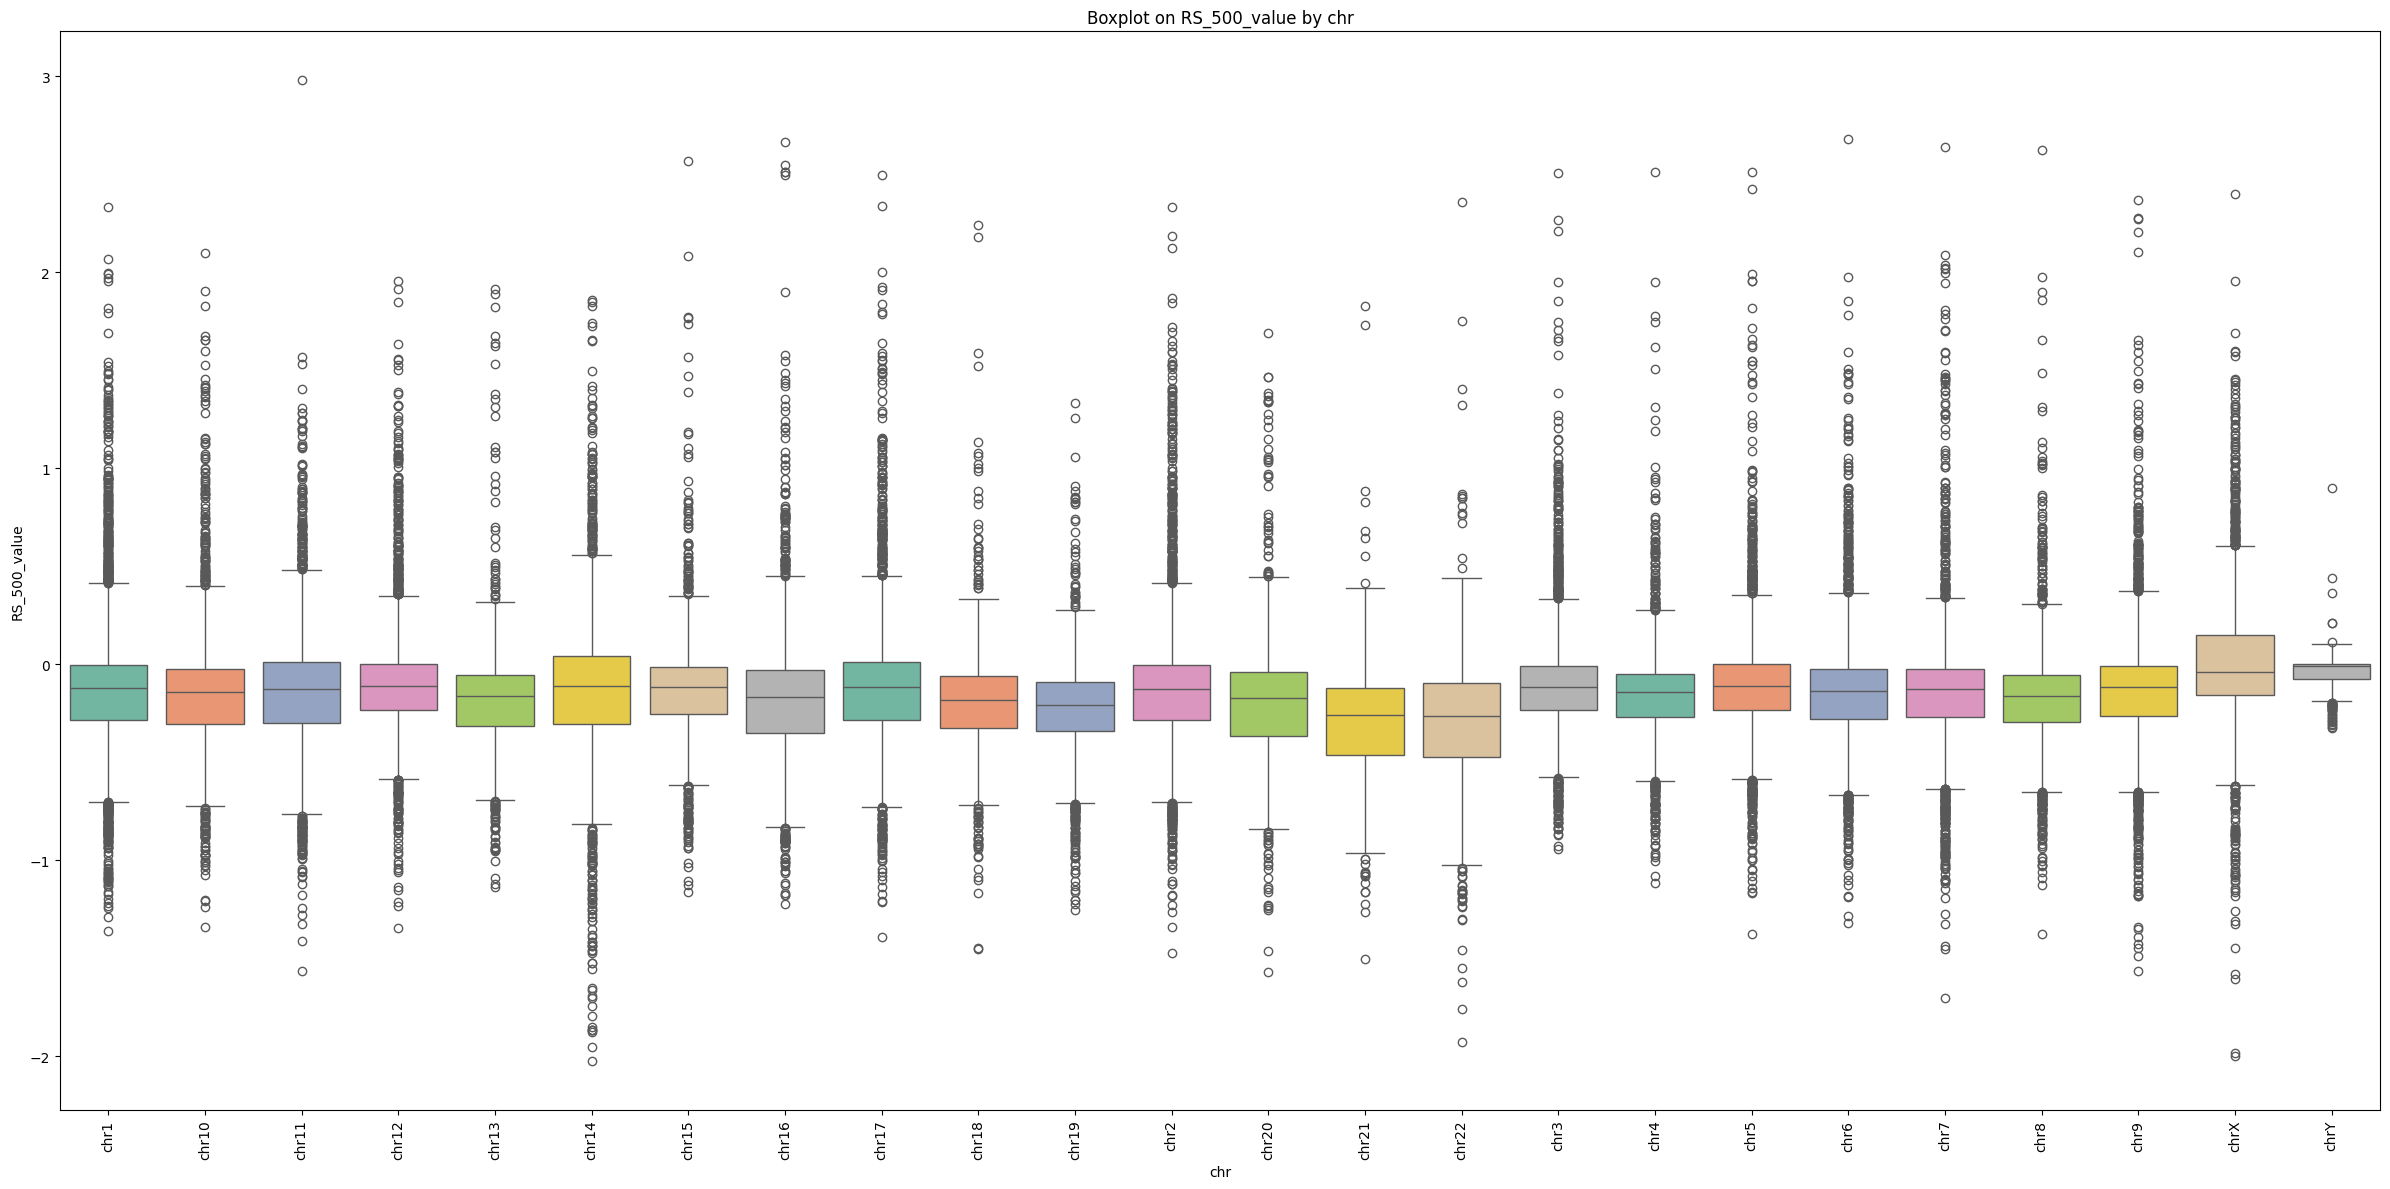

C:\Users\LOLpm\AppData\Local\Temp\ipykernel_7852\957095972.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='chr', y=metric, data=df, palette="Set2")


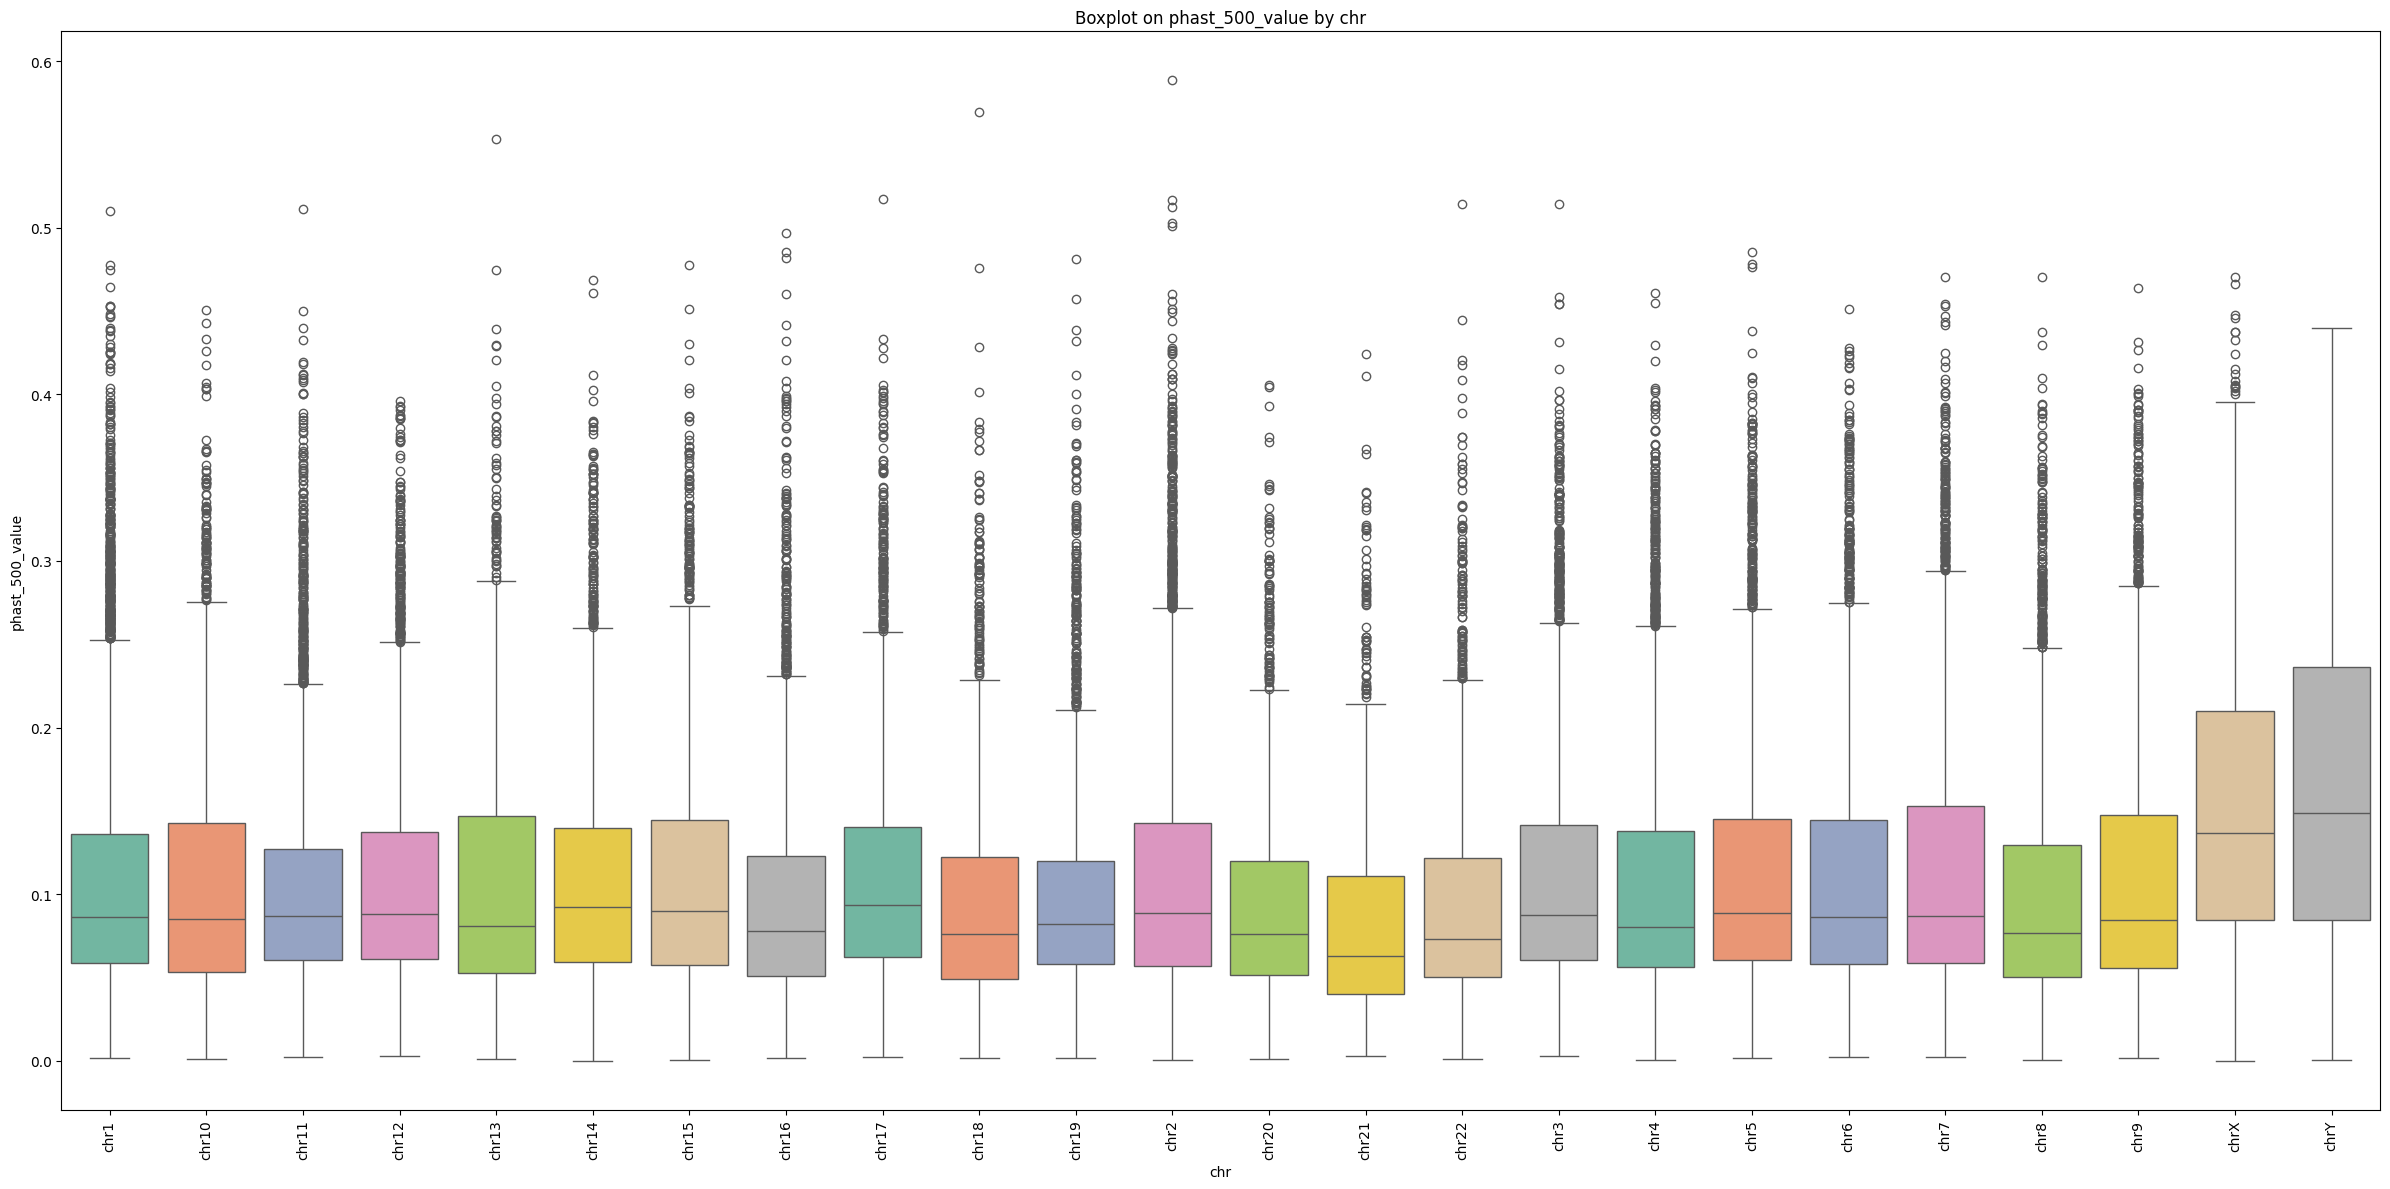

C:\Users\LOLpm\AppData\Local\Temp\ipykernel_7852\957095972.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='chr', y=metric, data=df, palette="Set2")


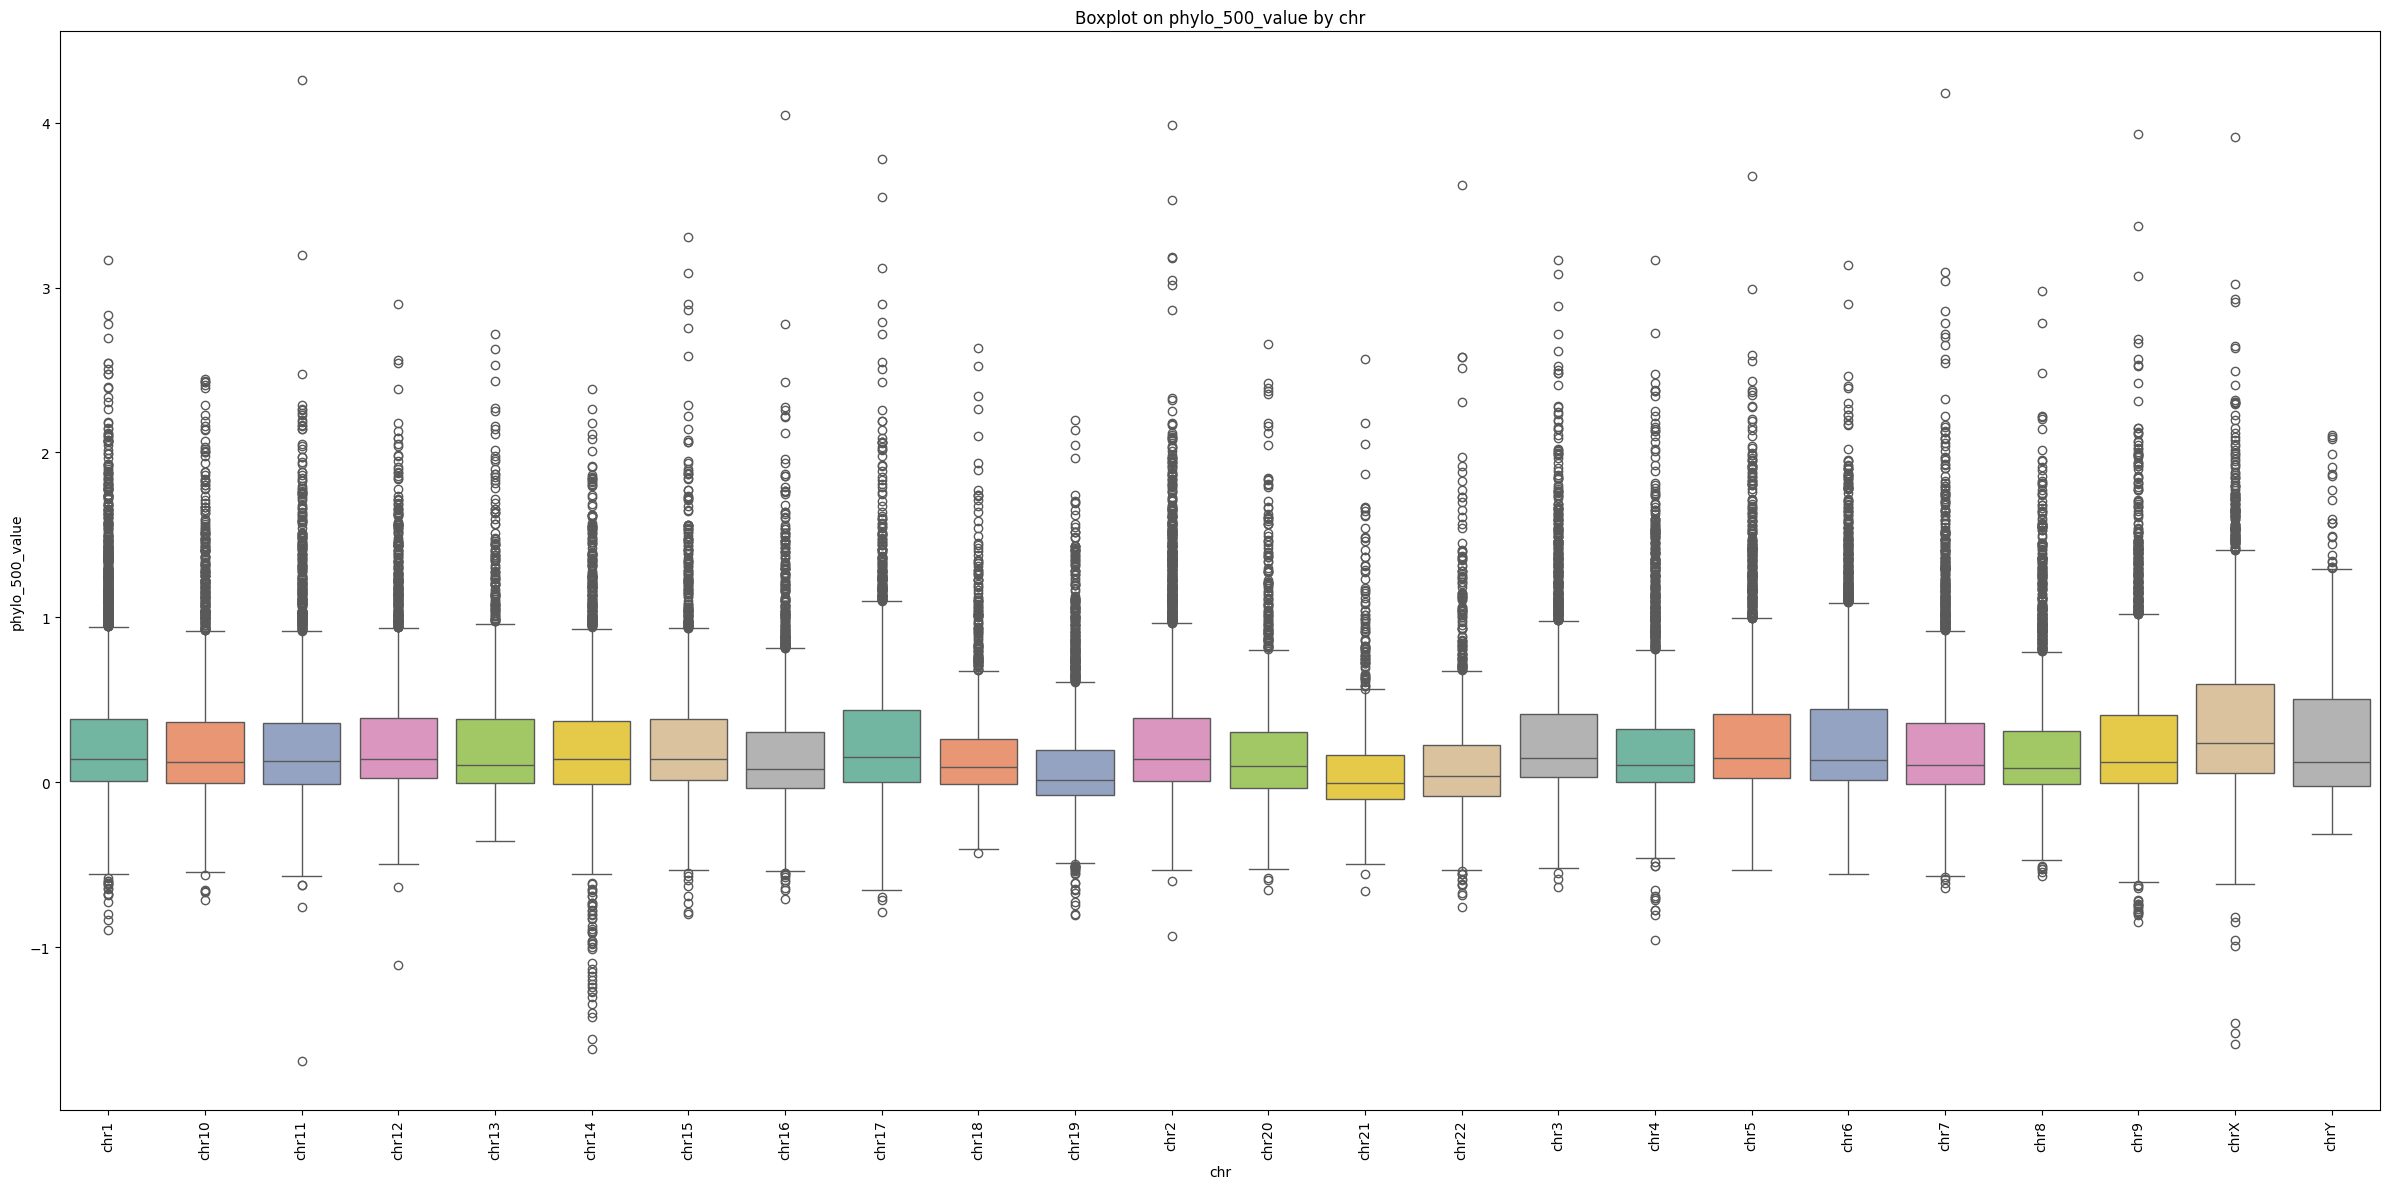

C:\Users\LOLpm\AppData\Local\Temp\ipykernel_7852\957095972.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='chr', y=metric, data=df, palette="Set2")


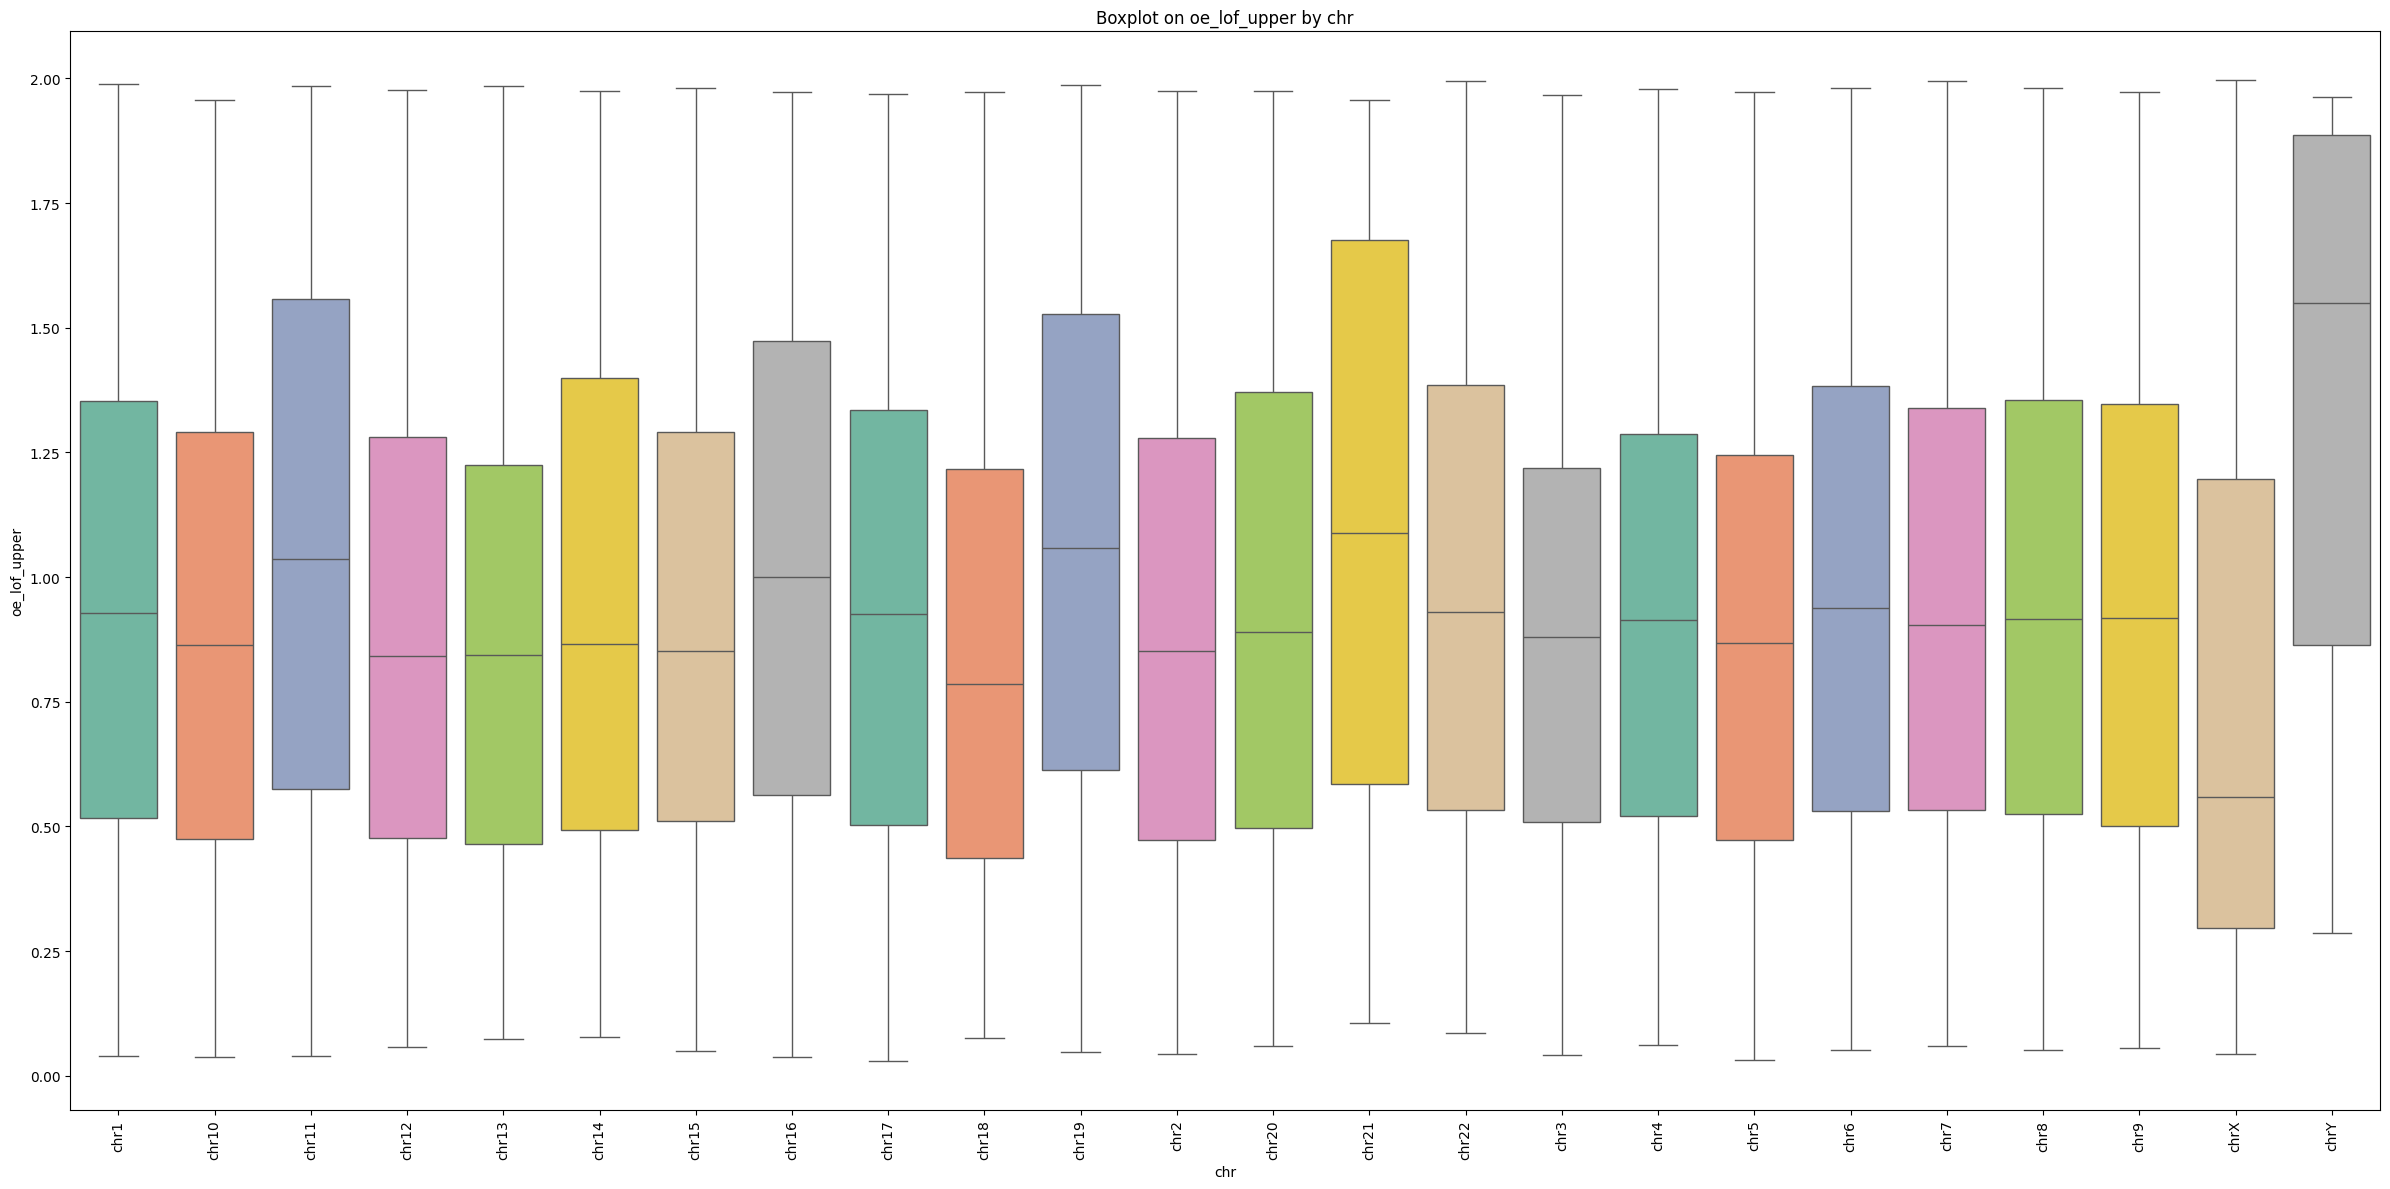

C:\Users\LOLpm\AppData\Local\Temp\ipykernel_7852\957095972.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='chr', y=metric, data=df, palette="Set2")


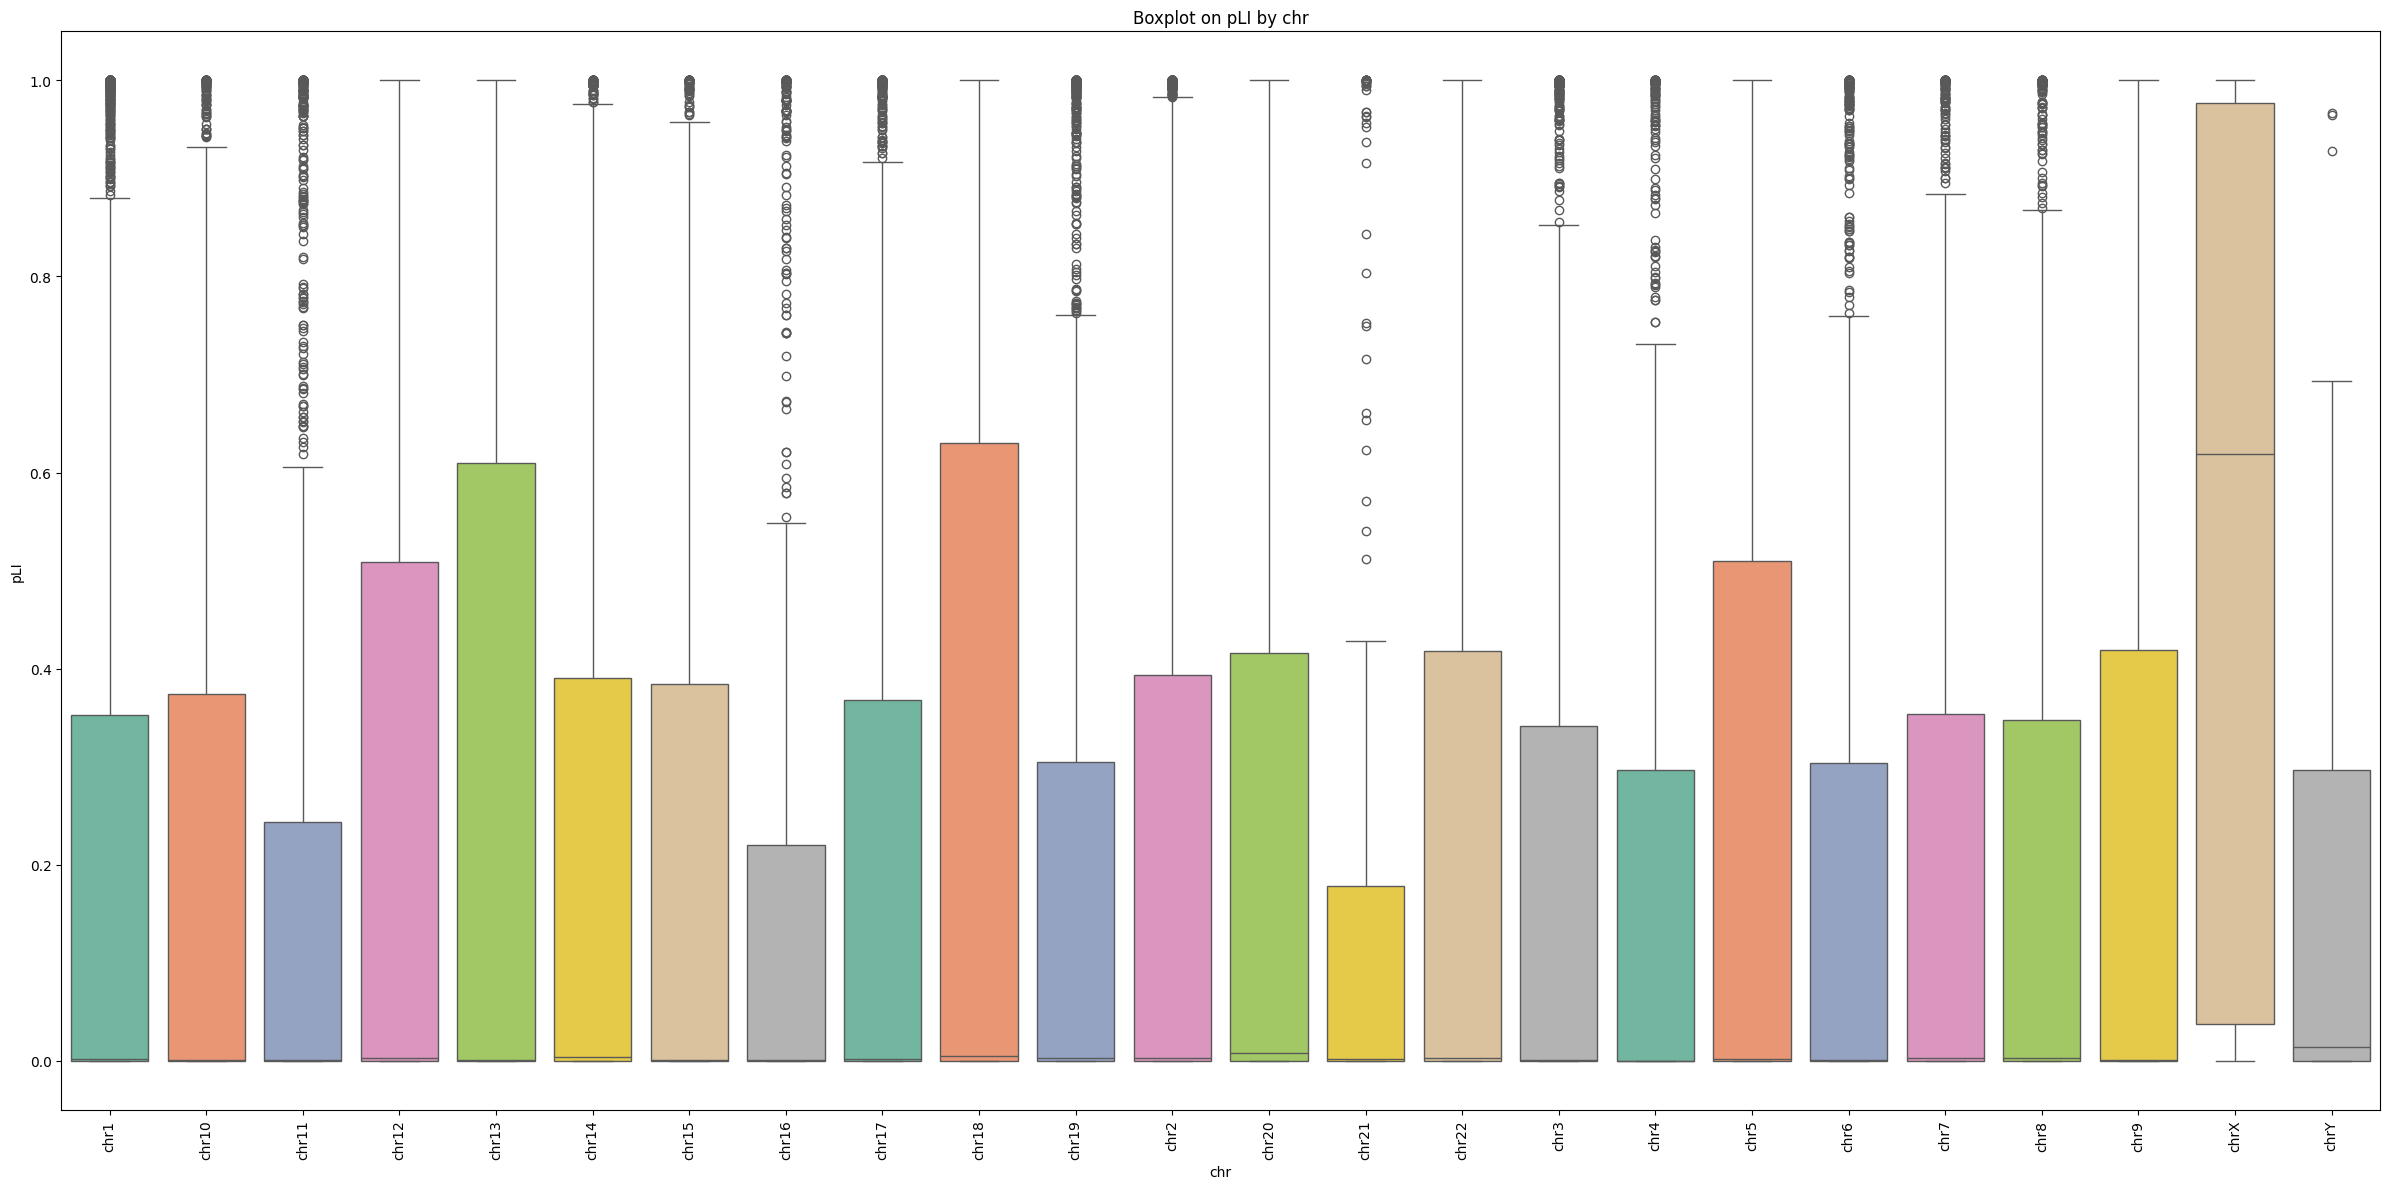

C:\Users\LOLpm\AppData\Local\Temp\ipykernel_7852\957095972.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='chr', y=metric, data=df, palette="Set2")


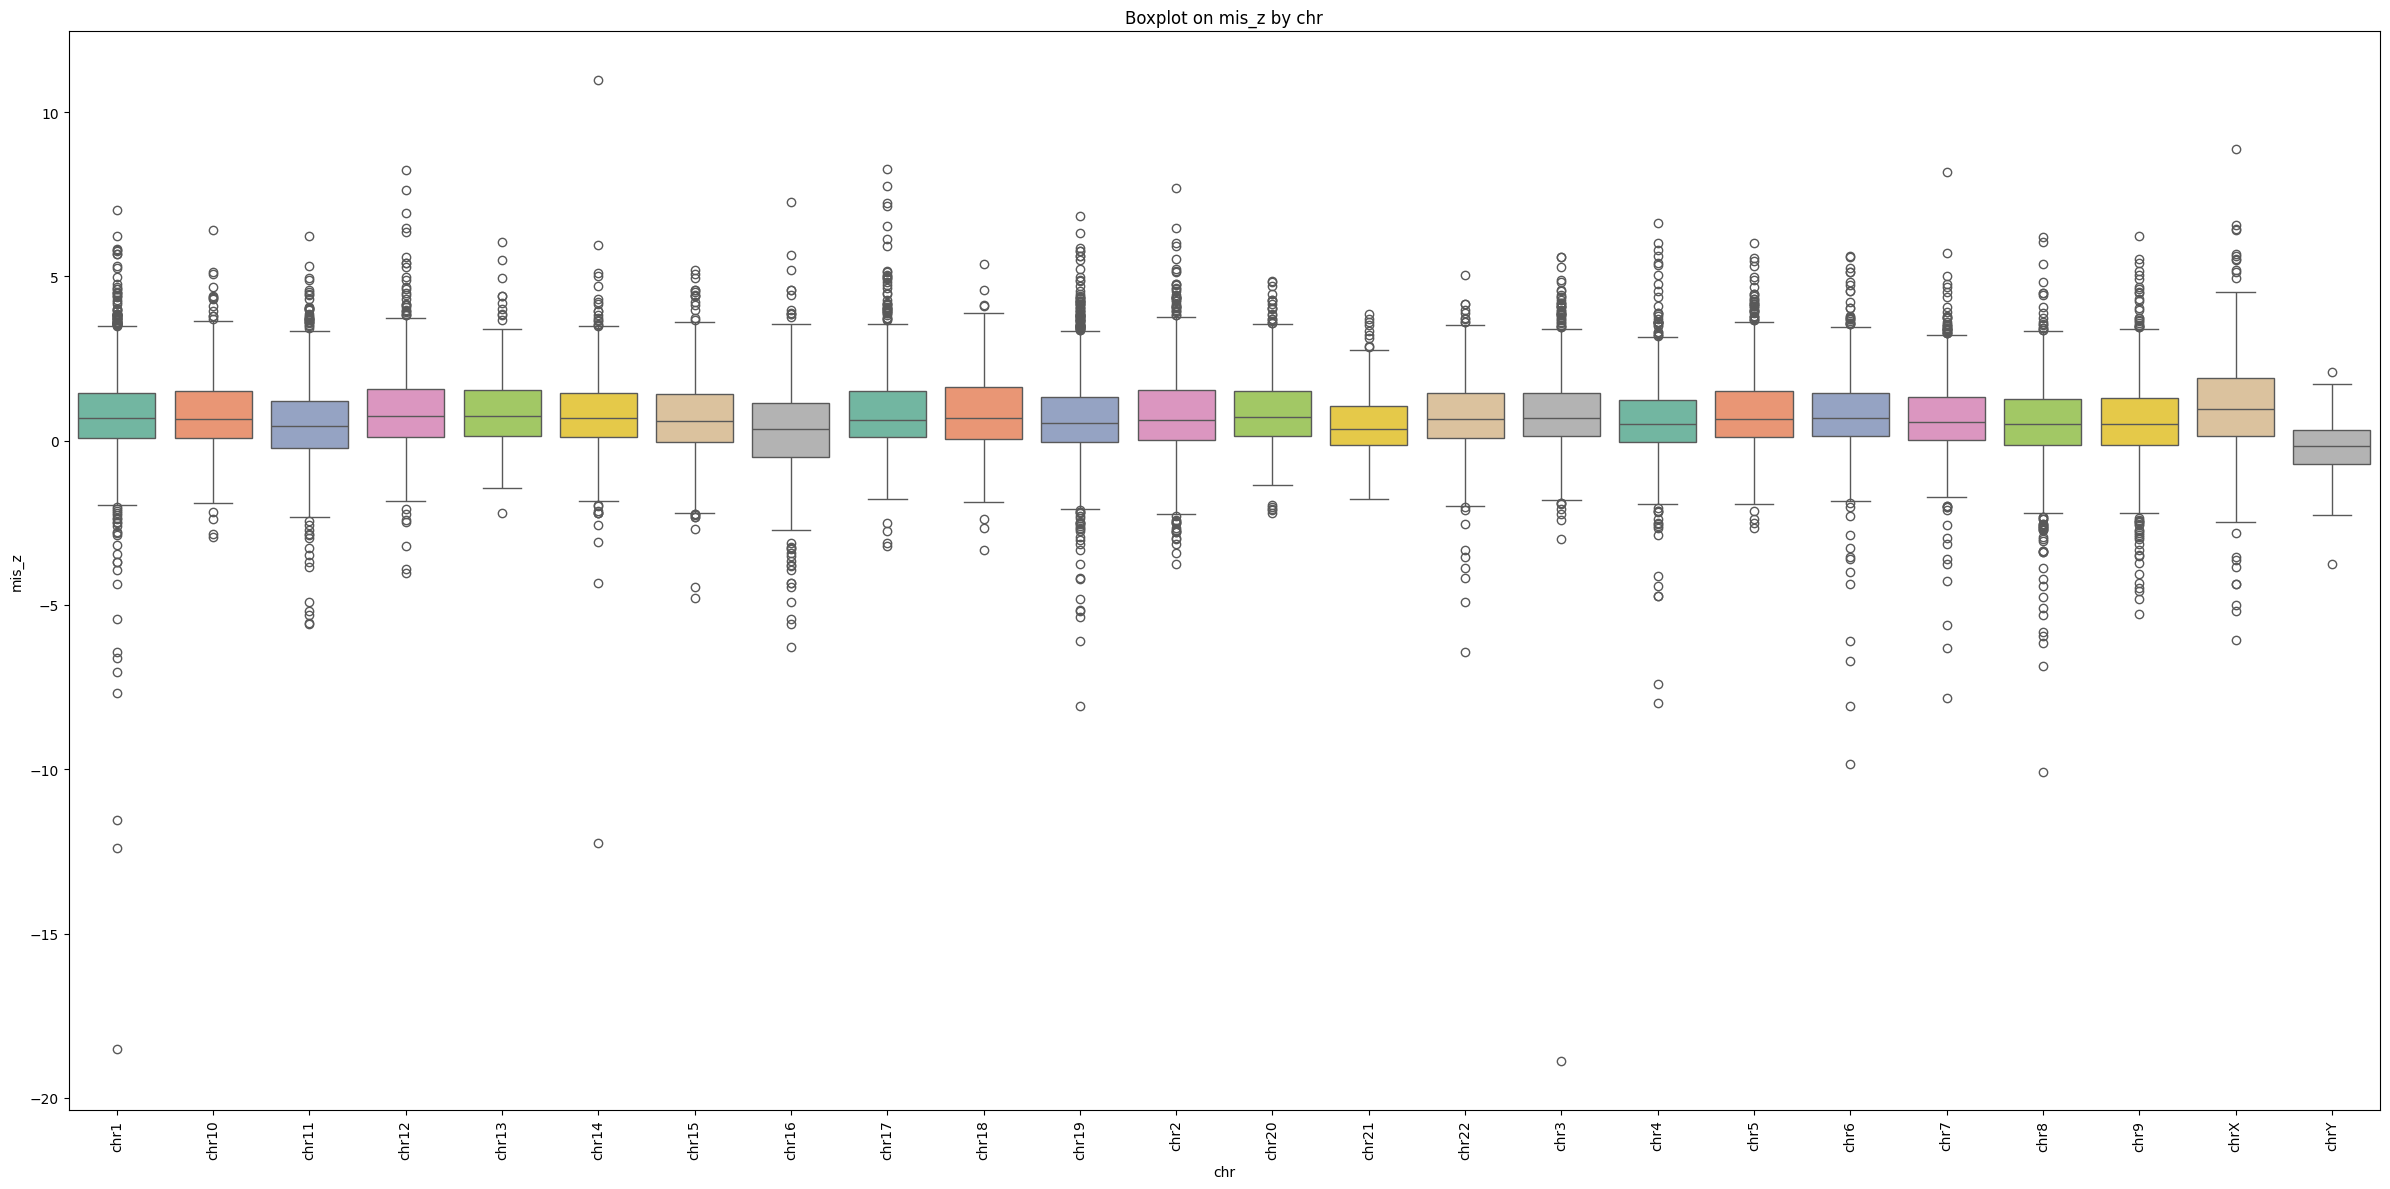

C:\Users\LOLpm\AppData\Local\Temp\ipykernel_7852\957095972.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='chr', y=metric, data=df, palette="Set2")


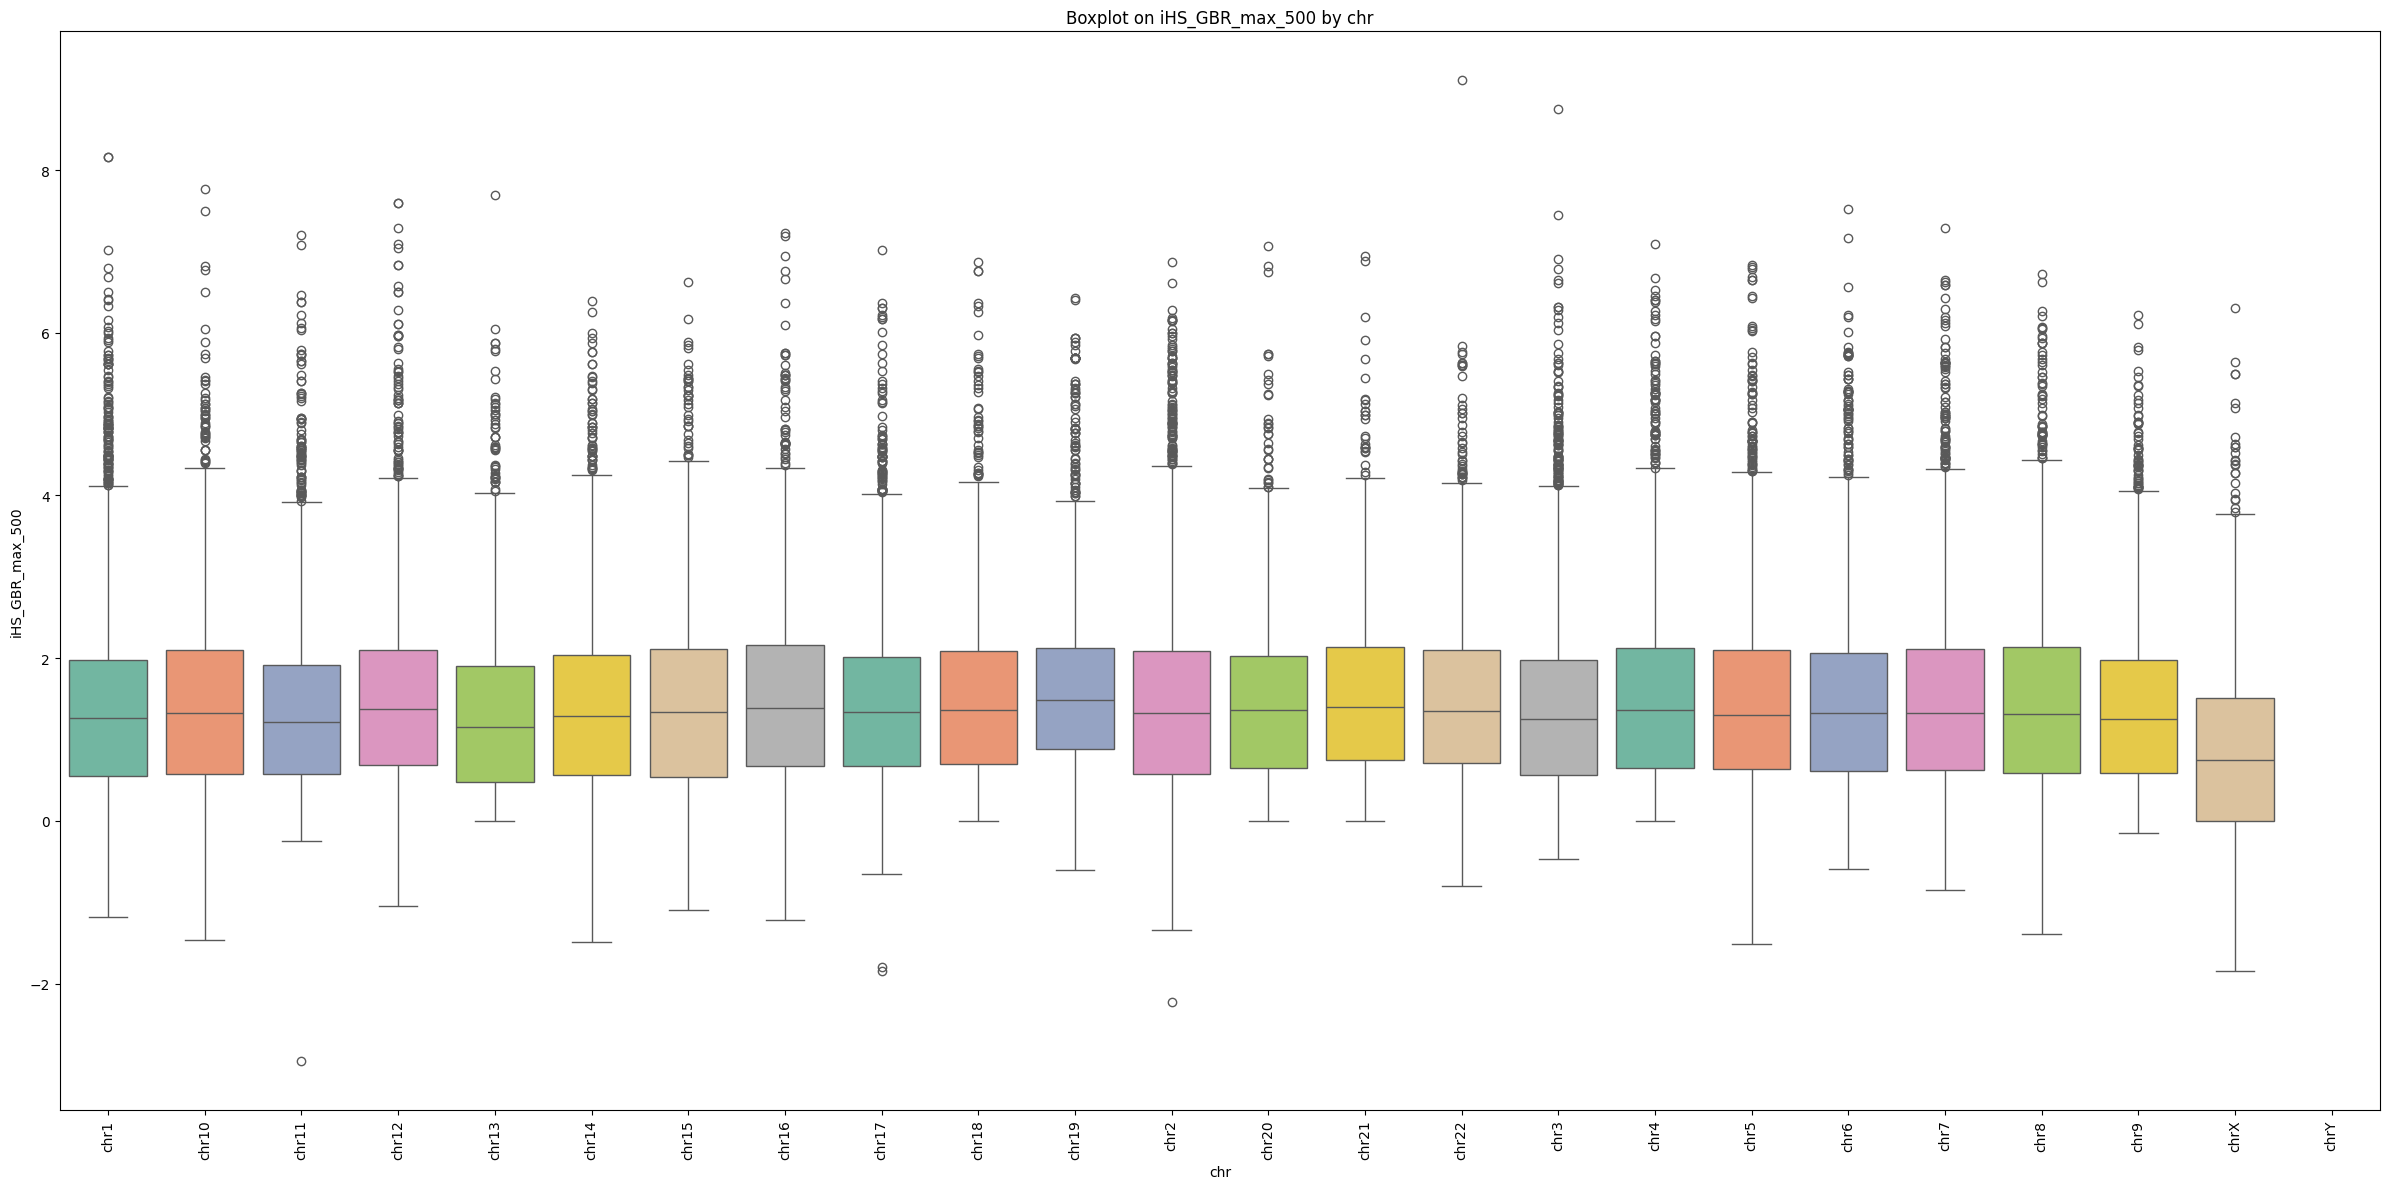

C:\Users\LOLpm\AppData\Local\Temp\ipykernel_7852\957095972.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='chr', y=metric, data=df, palette="Set2")


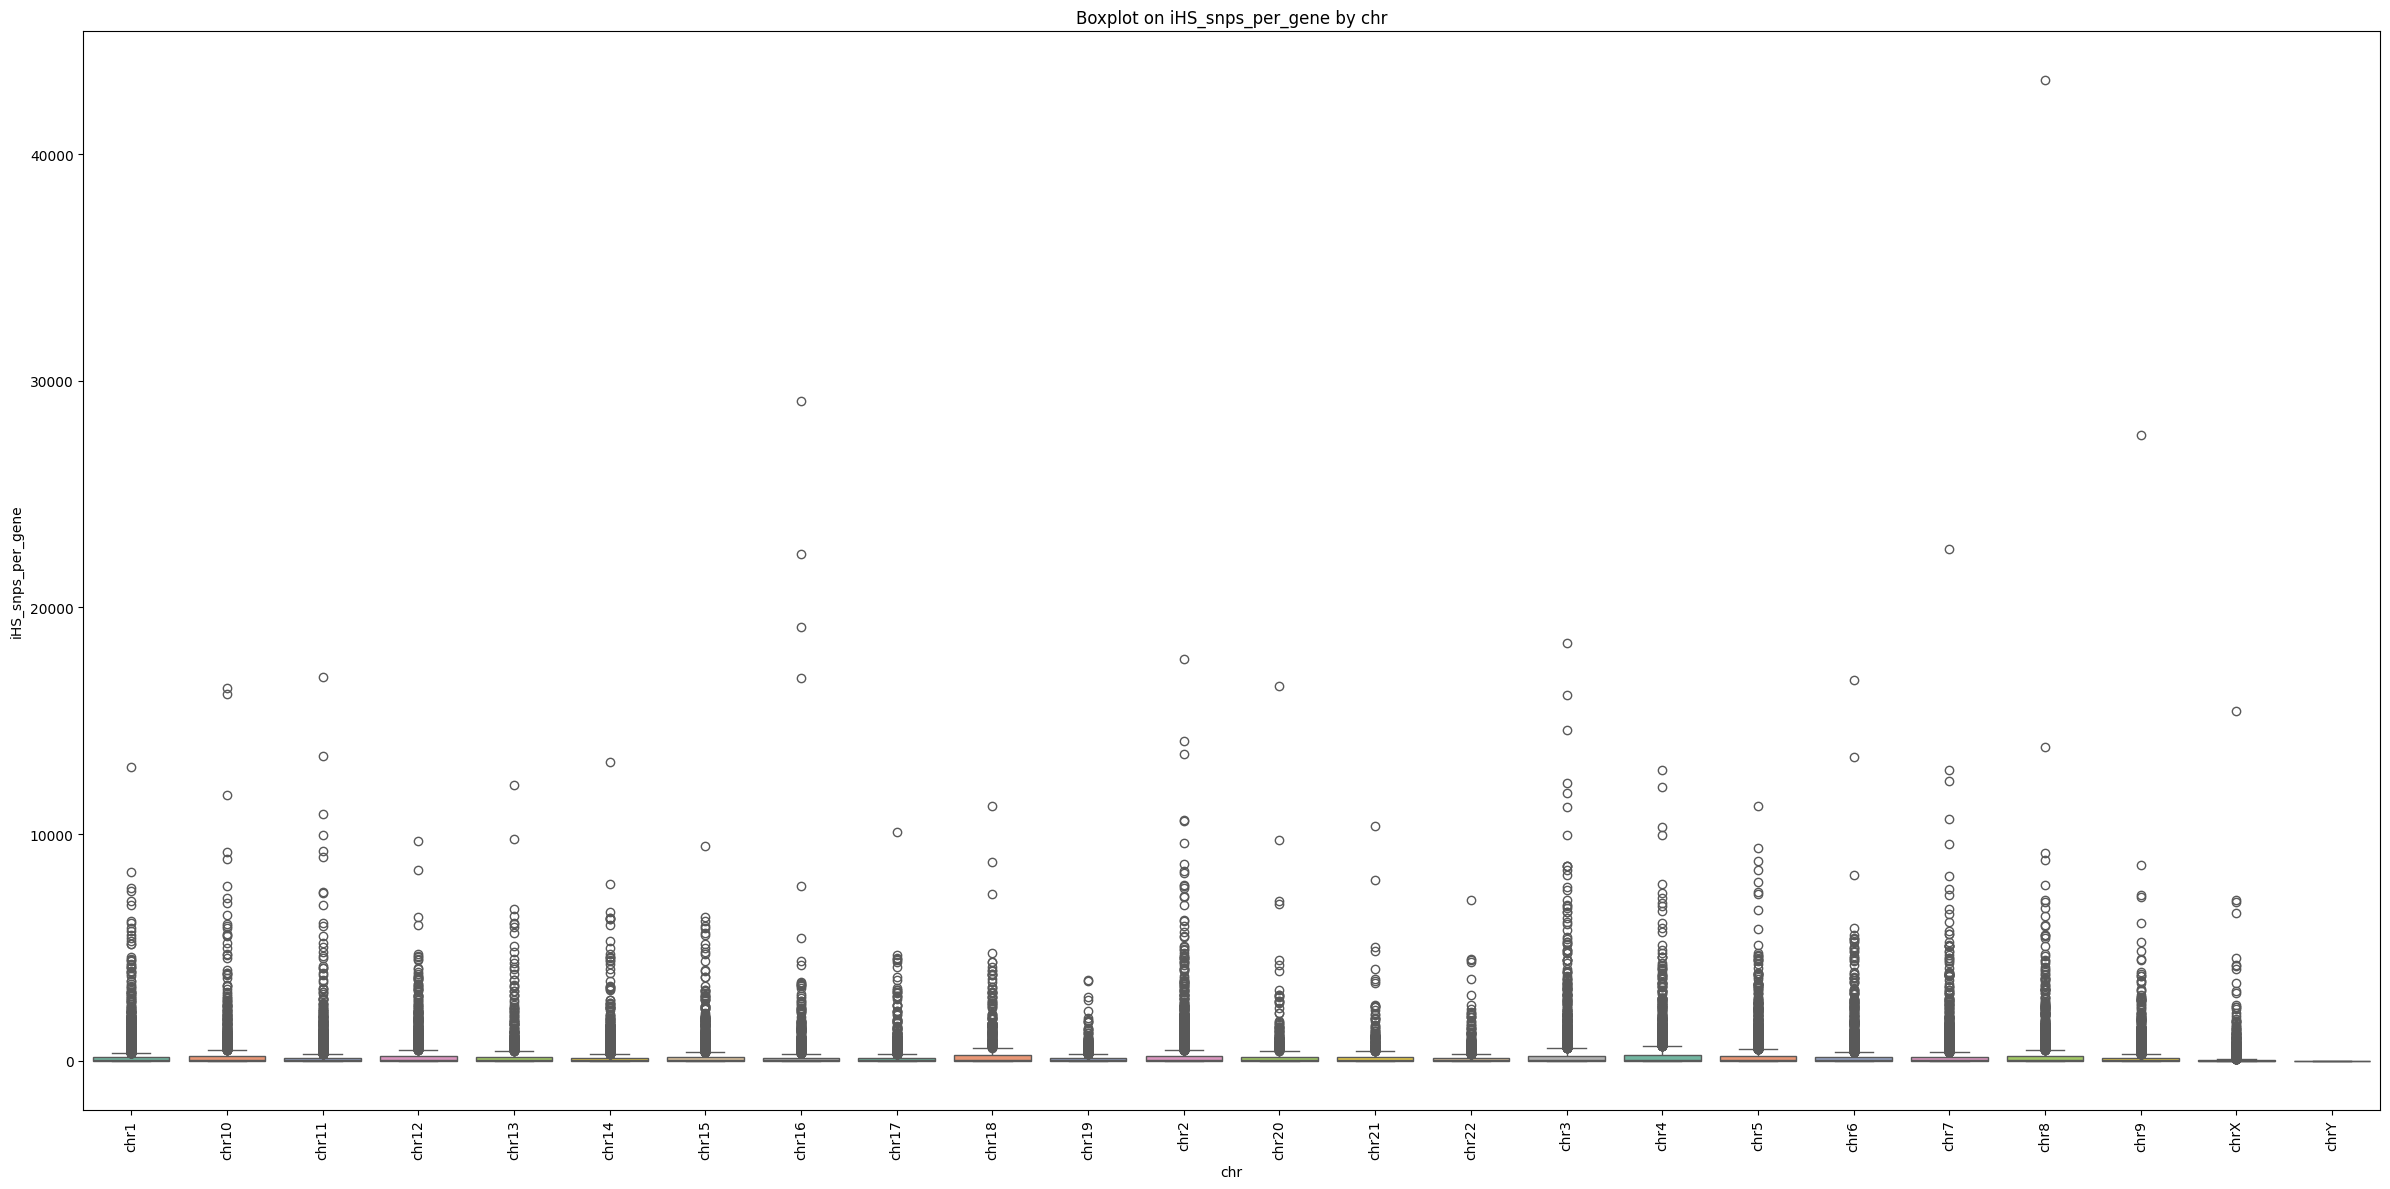

C:\Users\LOLpm\AppData\Local\Temp\ipykernel_7852\957095972.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='chr', y=metric, data=df, palette="Set2")


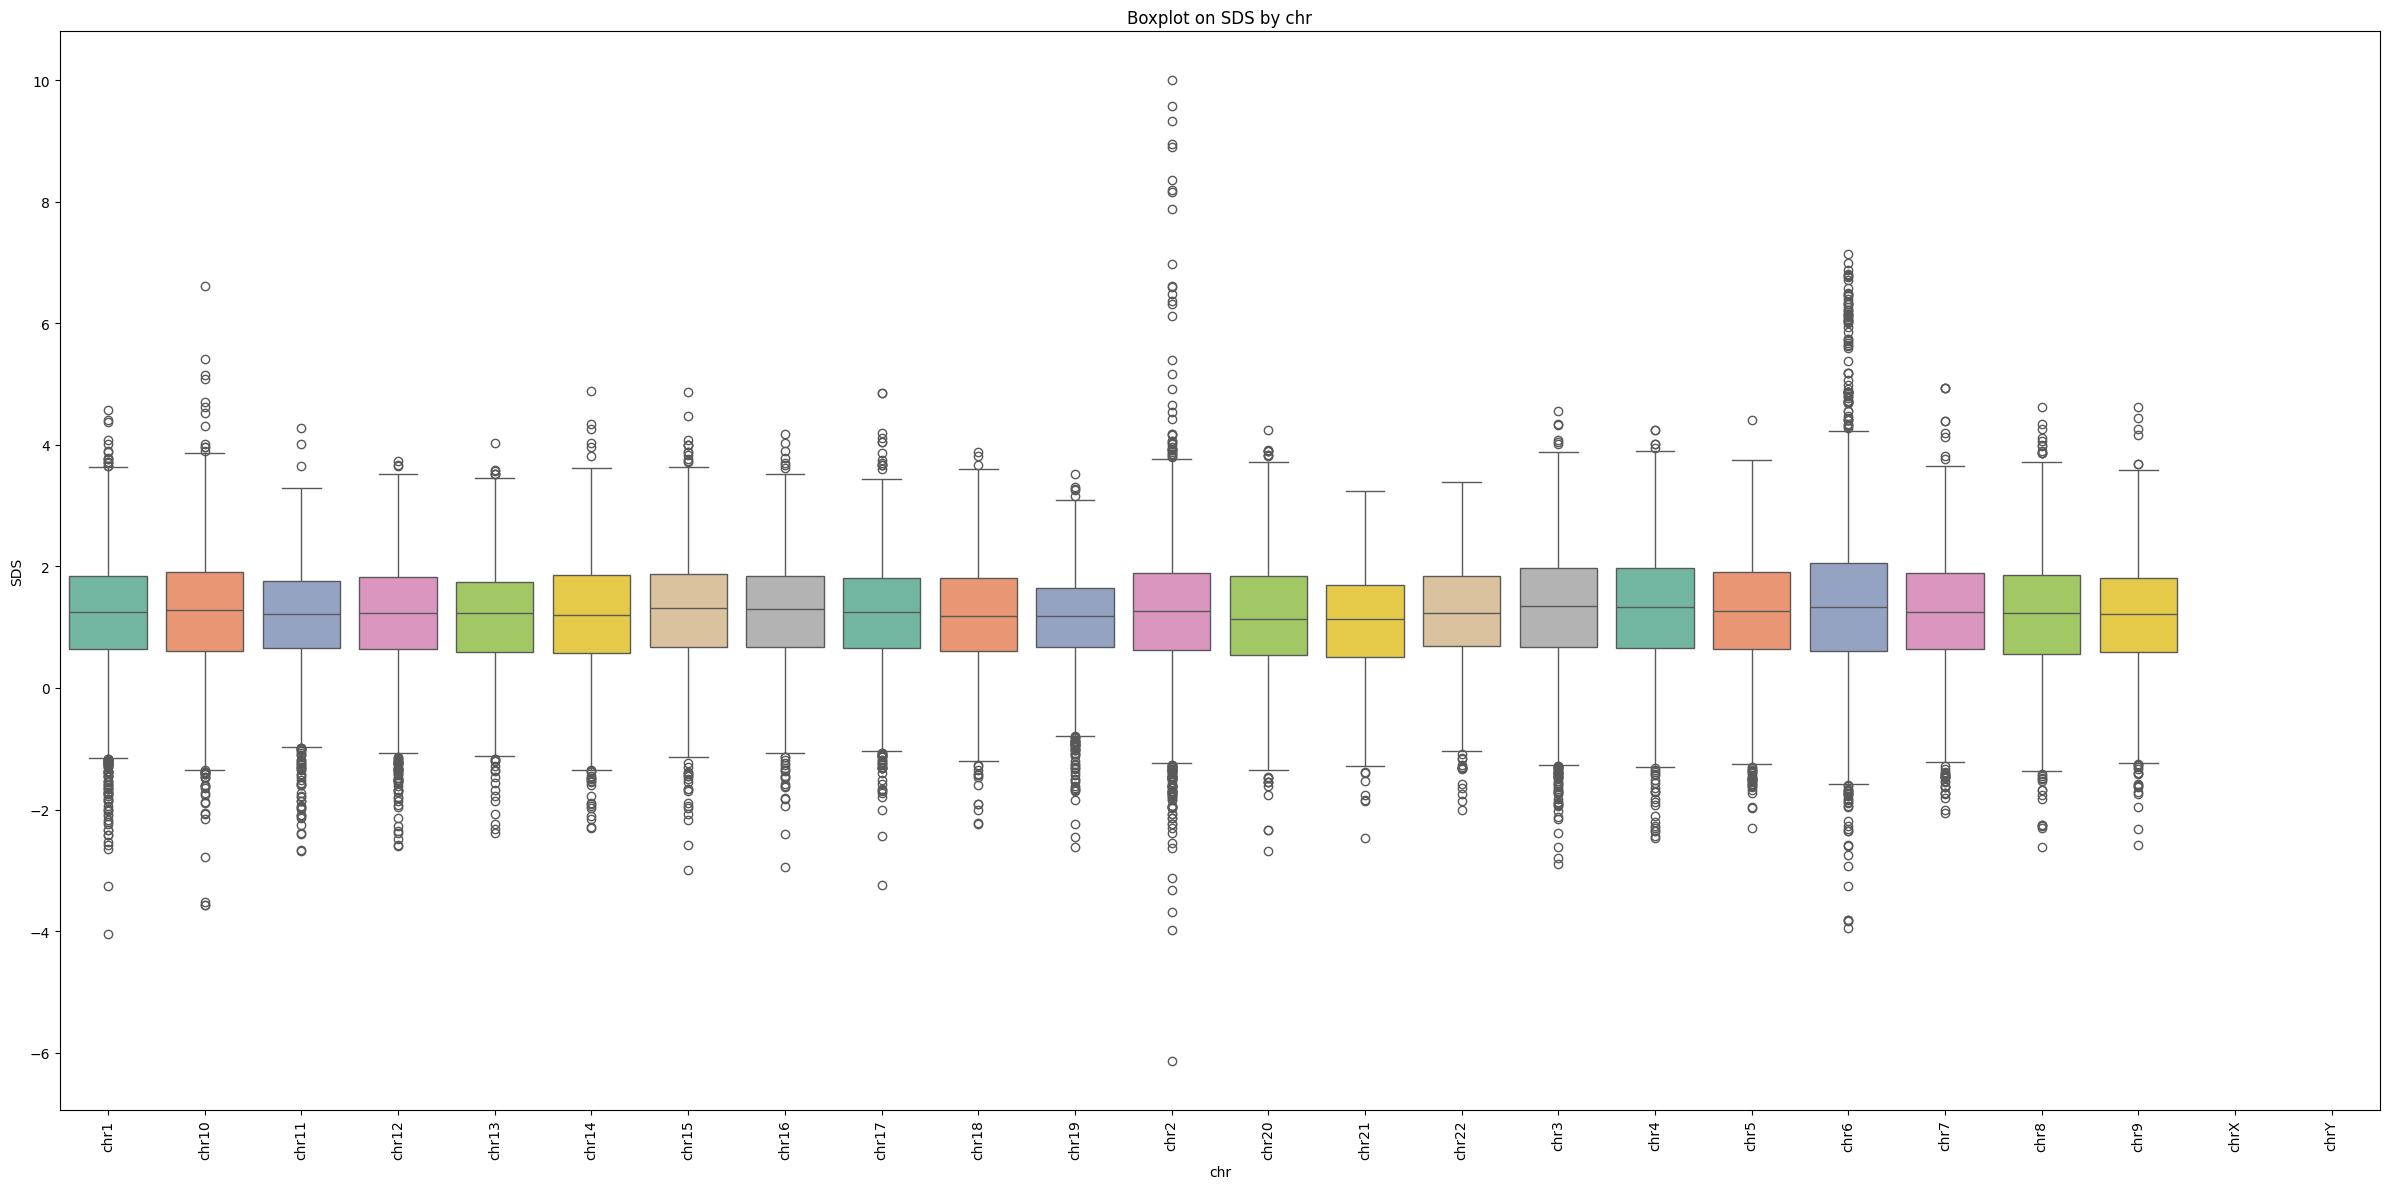

C:\Users\LOLpm\AppData\Local\Temp\ipykernel_7852\957095972.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='chr', y=metric, data=df, palette="Set2")


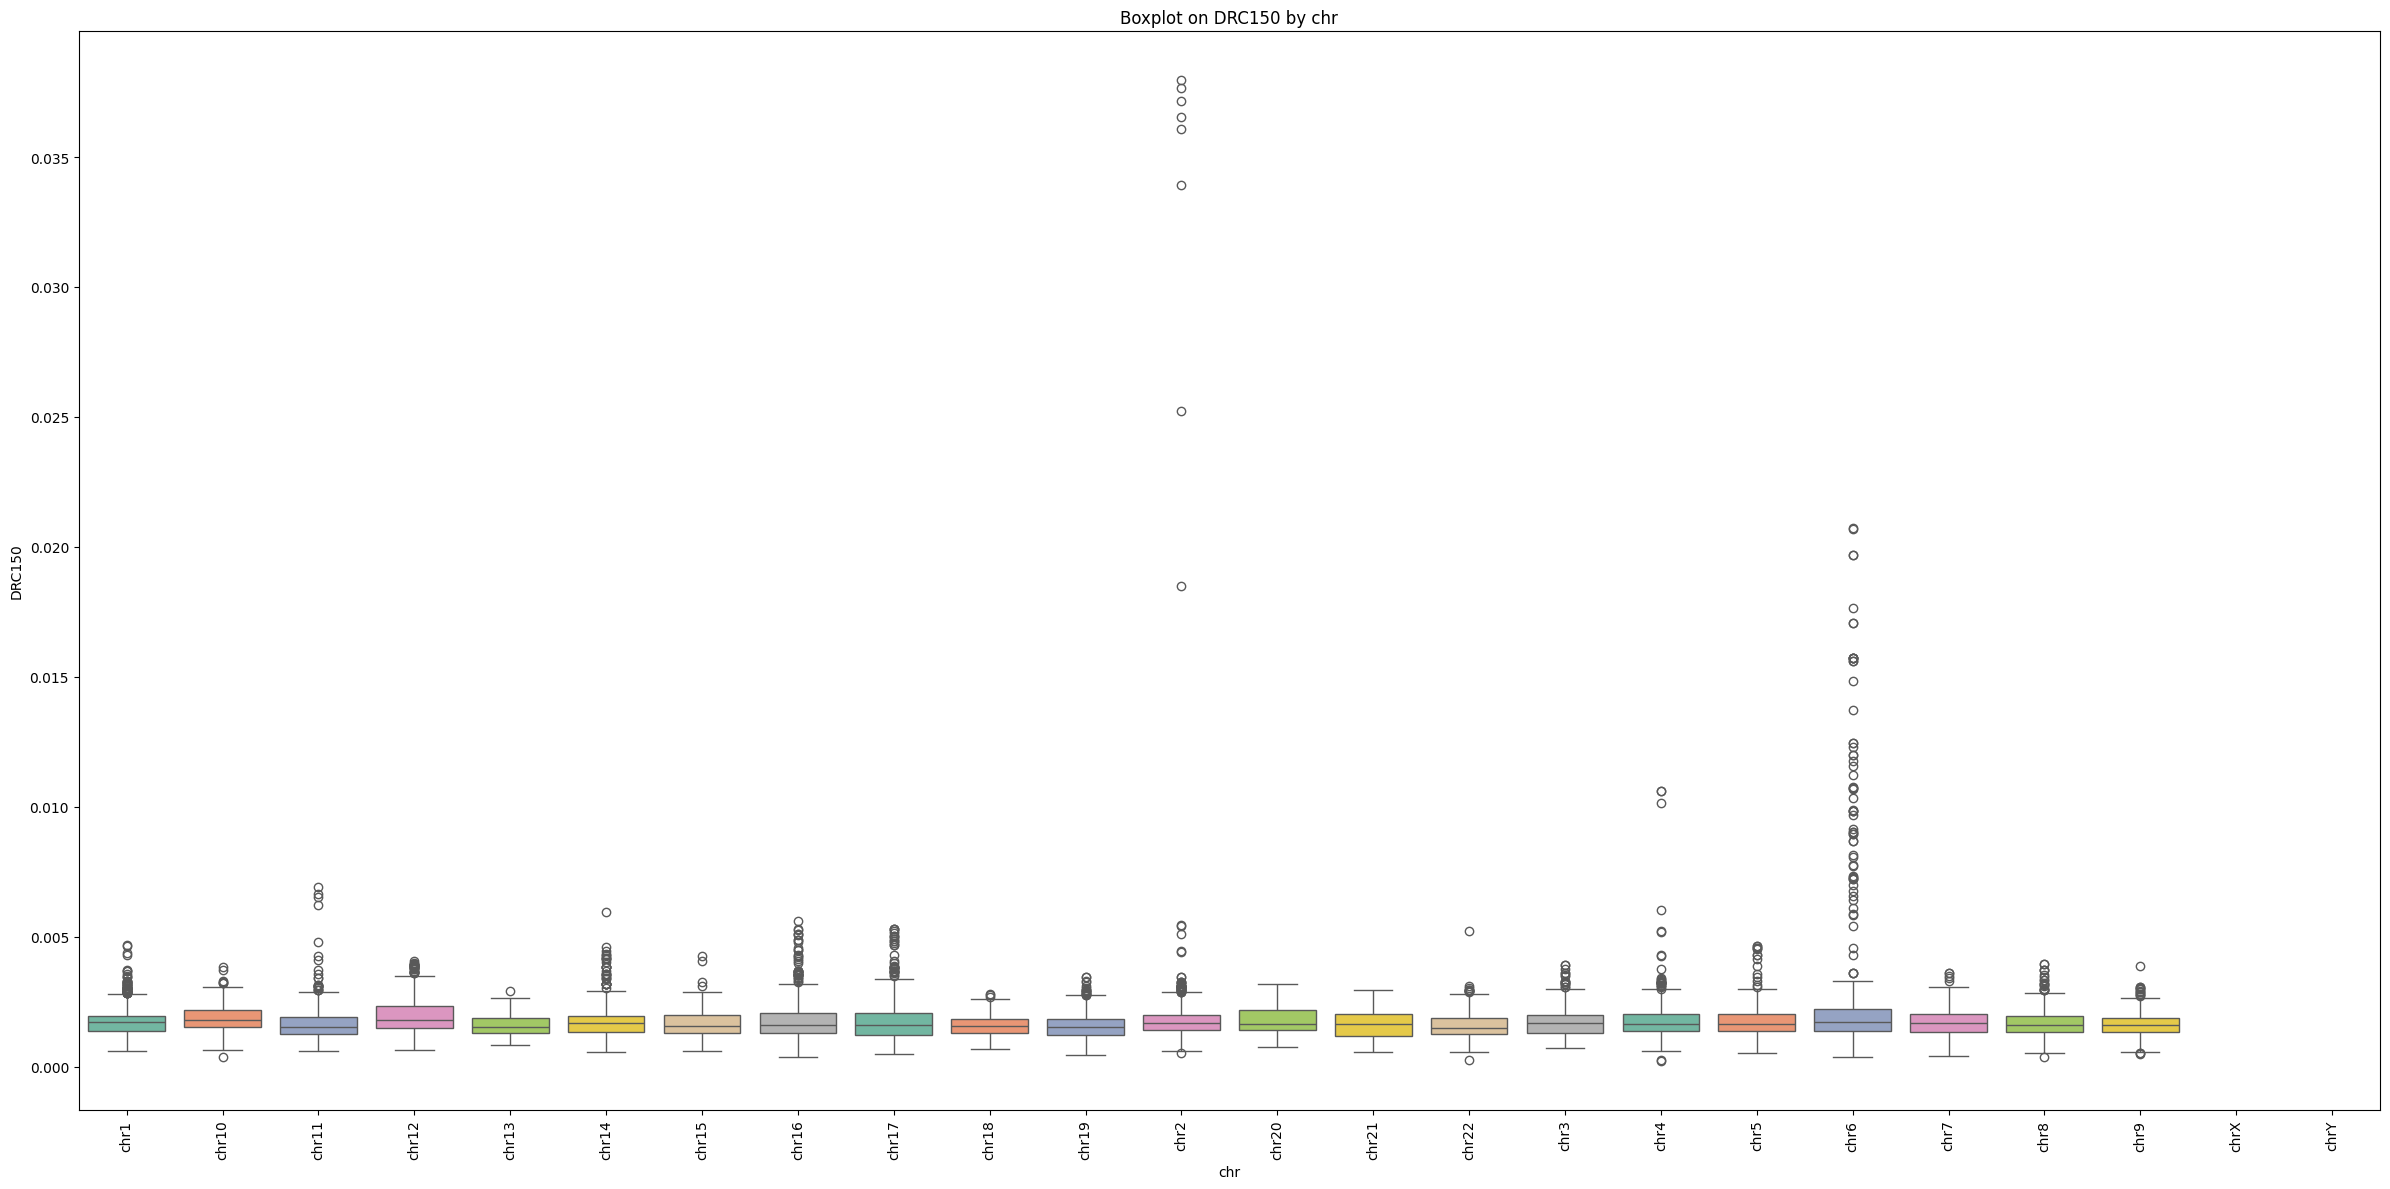

C:\Users\LOLpm\AppData\Local\Temp\ipykernel_7852\957095972.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='chr', y=metric, data=df, palette="Set2")


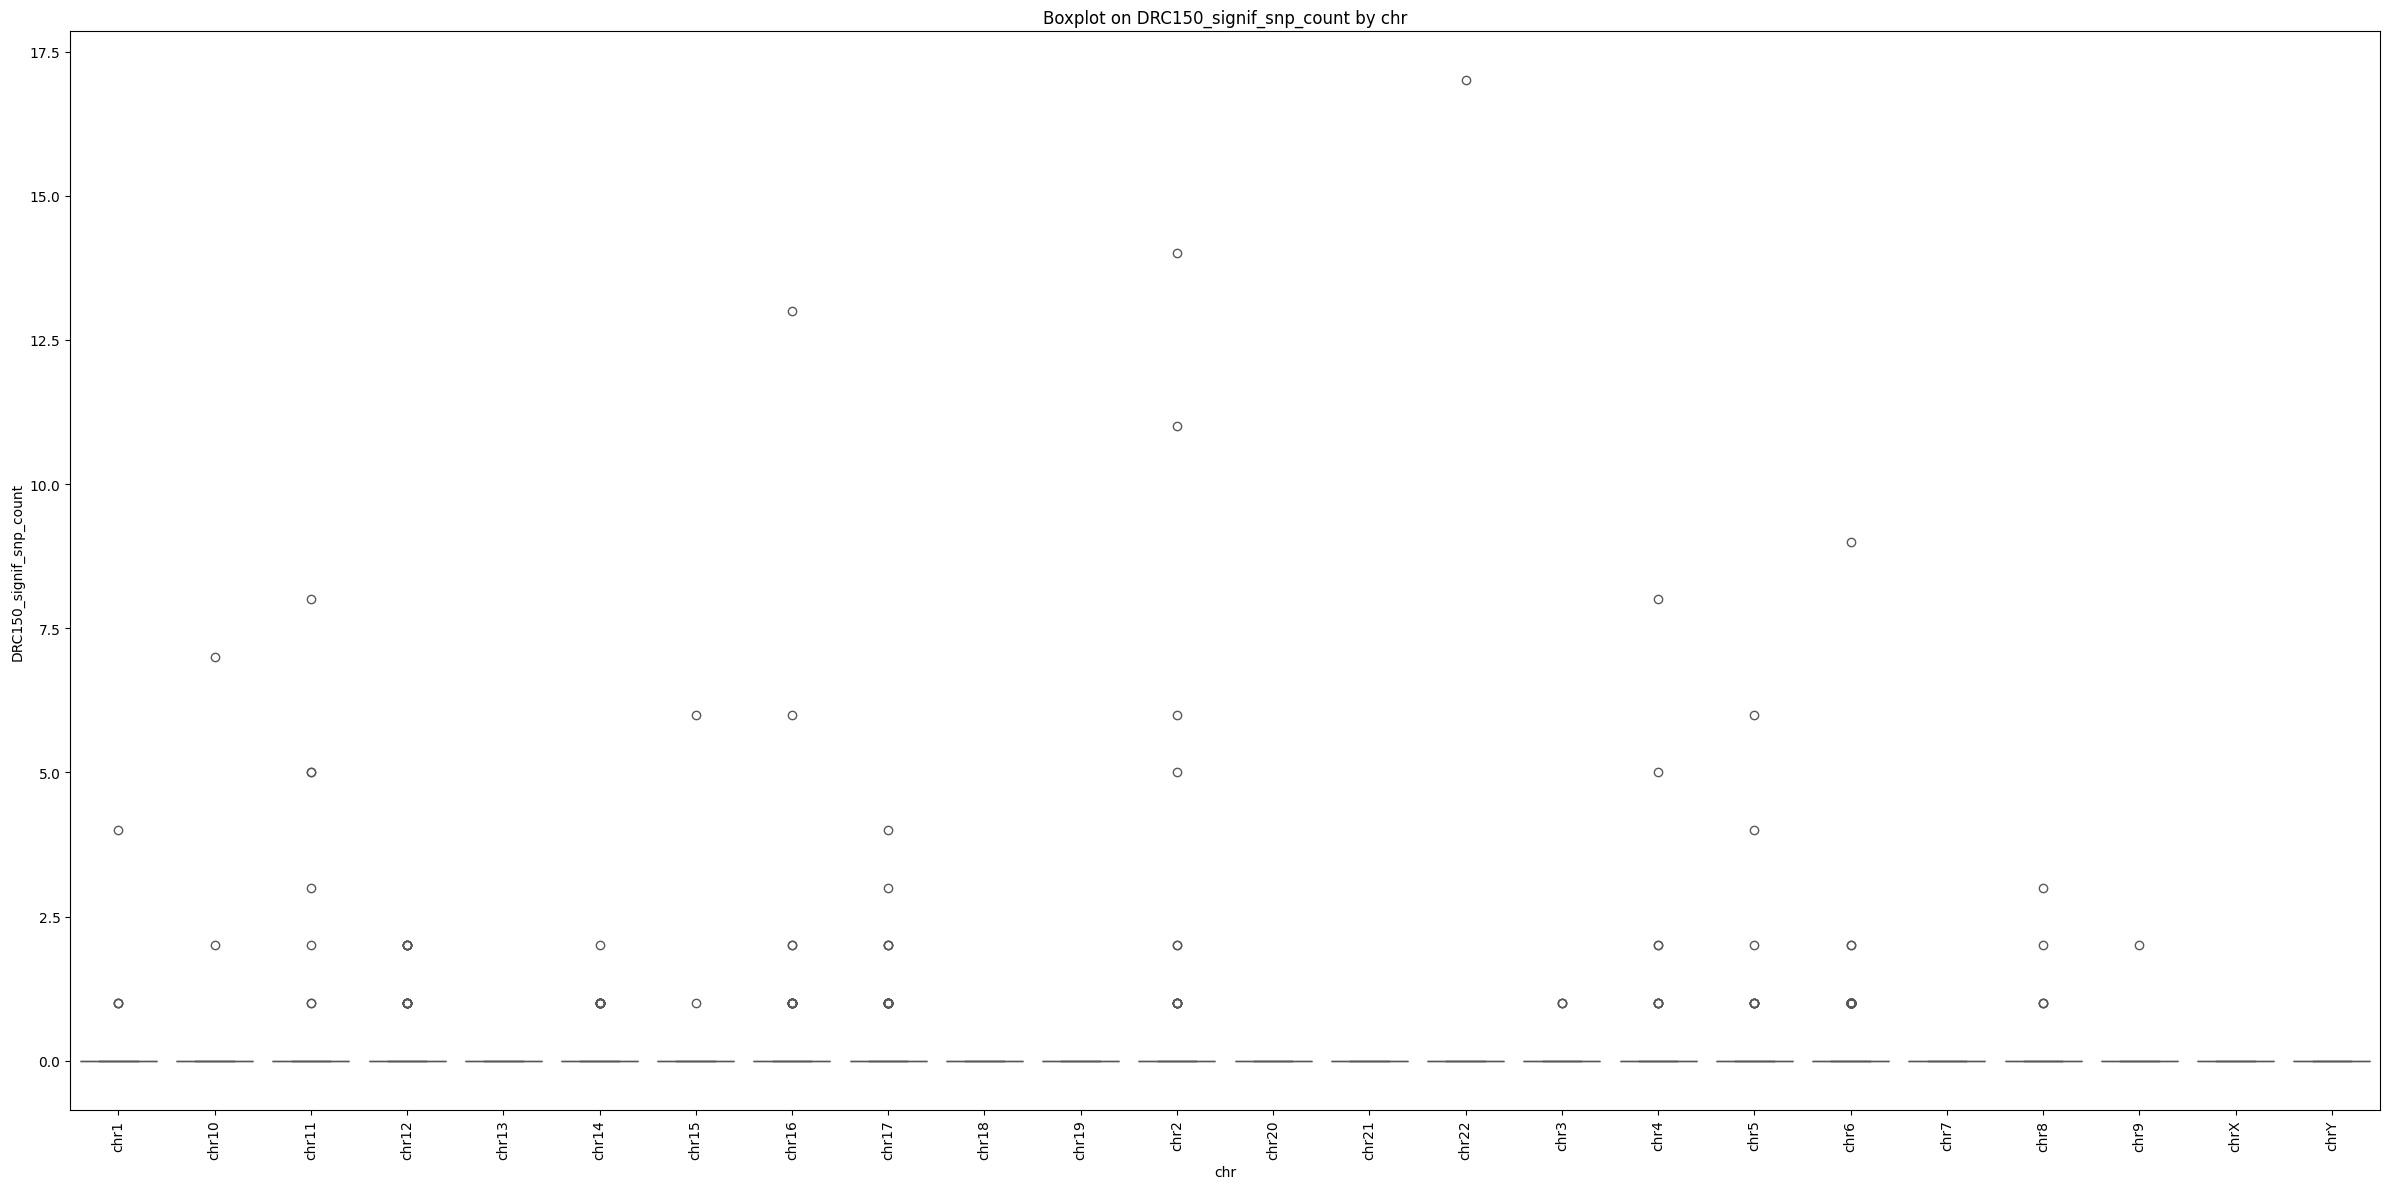

In [16]:
chromosomes = df.groupby(by=df['chr'])
metrics = ['RS_500_value', 'phast_500_value', 'phylo_500_value',
    'oe_lof_upper', 'pLI', 'mis_z',
    'iHS_GBR_max_500', 'iHS_snps_per_gene', 'SDS', 'DRC150', 'DRC150_signif_snp_count']

path_to_boxplots = os.path.join(current_dir, '..', 'data', 'distribution_plots')
os.makedirs(path_to_boxplots, exist_ok=True)

for metric in metrics:
    plt.figure(figsize=(24, 12))  
    sns.boxplot(x='chr', y=metric, data=df, palette="Set2")
    
    name = f'{str(metric).replace(" ", "_")}__by_chr.png'  
    output = os.path.join(path_to_boxplots, name)

    plt.title(f'Boxplot on {metric} by chr')
    plt.xticks(rotation=90)  
    plt.tight_layout() 
    plt.savefig(output, dpi=300, bbox_inches='tight')  
    plt.show() 

# Search for min and max of metrics

For each metric, we looked at which gene it had the maximum value in: 

RS_500_value : IGIP(5) (iHS_GBR_max_500 = 0.162)

phast_500_value : AL590235.1(4) (iHS_GBR_max_500 = 2.338)

phylo_500_value : ZBTB18(1)

iHS_GBR_max_500 : DGCR14(22) (RS_500_value = -0.369603, phast_500_value = 0.086461)

oe_lof_upper : SSX1(X) 

pLI : CHD5(1) 

mis_z : DYNC1H1 

In [44]:
columns_pc = ['RS_500_value', 'phast_500_value', 'phylo_500_value', 'iHS_GBR_max_500', 'oe_lof_upper', 'pLI', 'mis_z']

for col in columns_pc:
    c = pc.loc[pc[col].idxmax()]
    print(f'\nCOLUMN TYPE {col}\n')
    print(c)


COLUMN TYPE RS_500_value

chr                          chr5
start                   139505520
end                     139508391
gene_name                    IGIP
gene_type          protein_coding
gene_len                     2871
RS_value                 2.822075
RS_500_value             2.510654
phast_value              0.166825
phast_500_value          0.167785
phylo_value              2.233227
phylo_500_value          1.952357
iHS_GBR_max_500             0.162
oe_lof_upper                1.757
pLI                       0.37789
mis_z                     0.10432
Name: 43608, dtype: object

COLUMN TYPE phast_500_value

chr                          chr4
start                     3511522
end                       3511678
gene_name              AL590235.1
gene_type          protein_coding
gene_len                      156
RS_value                -0.056423
RS_500_value            -0.081394
phast_value              0.288865
phast_500_value          0.455068
phylo_value               0.1500

# iHS SNPs search

##### QQ plot

- If you performed N tests, take the -log (base 10) of each of
the p-values and put them in rank order from smallest to
largest

- Create a vector of N values evenly spaces from 1 to 1 / N
(how do we do this?), take the -log of each of these values
and rank them from smallest to largest

- Take the pair of the smallest of values of each of these lists
and plot a point on an x-y plot with the observed -log p-value
on the y-axis and the spaced -log value on the x-axis

- Repeat for the next smallest pair, for the next, etc. until you
have plotted all N pairs in order

C:\Users\LOLpm\AppData\Local\Temp\ipykernel_7852\715374169.py:4: RuntimeWarning: divide by zero encountered in log10
  observed = -np.log10(np.sort(p_values))


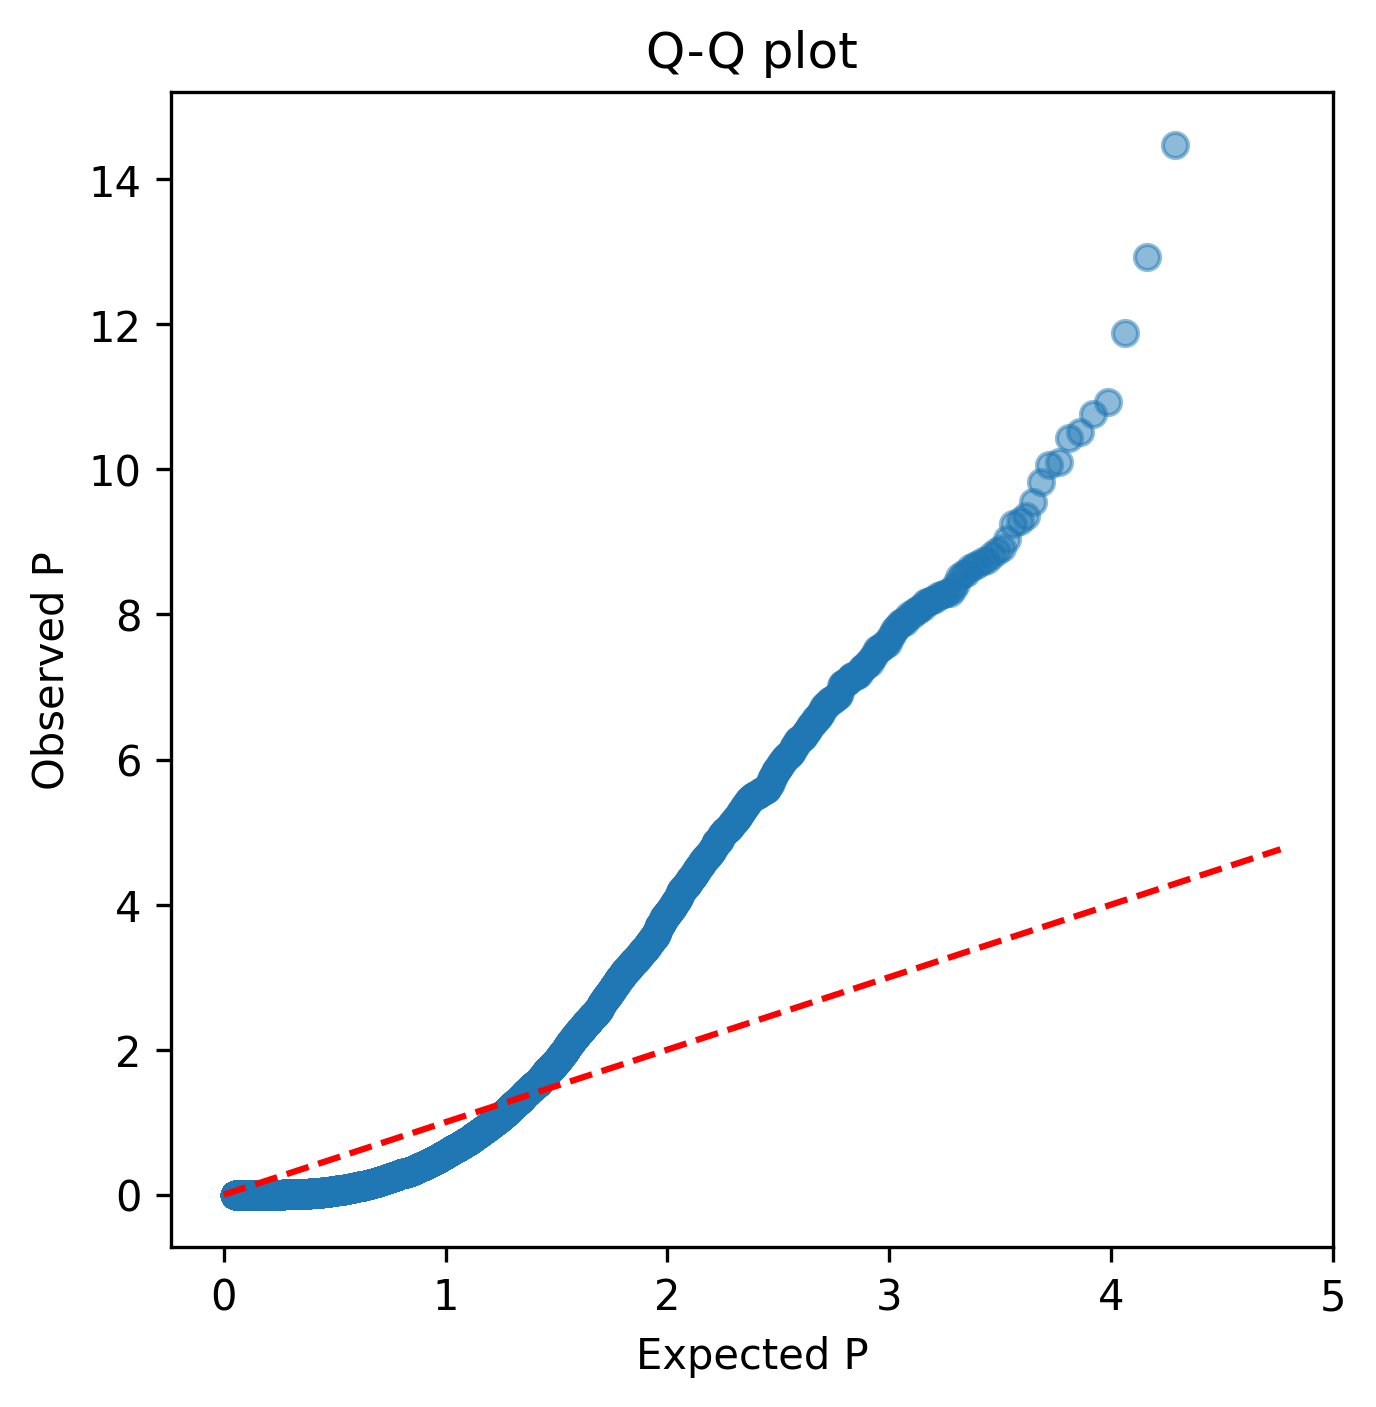

In [19]:
def create_qq_plot(p_values):
    n = len(p_values)
    expected = -np.log10(np.linspace(1/n, 1, n))
    observed = -np.log10(np.sort(p_values))
    plt.figure(figsize=(5, 5), dpi=300)
    plt.scatter(expected, observed, alpha=0.5)
    plt.plot([0, max(expected)], [0, max(expected)], 'r--')
    plt.xlabel('Expected P')
    plt.ylabel('Observed P')
    plt.title('Q-Q plot')
    plt.show()

create_qq_plot(df['pval_iHS_max'])

# Search for dependences between metrics and gene lenght

##### Hexbin plot

<Figure size 3000x1800 with 0 Axes>

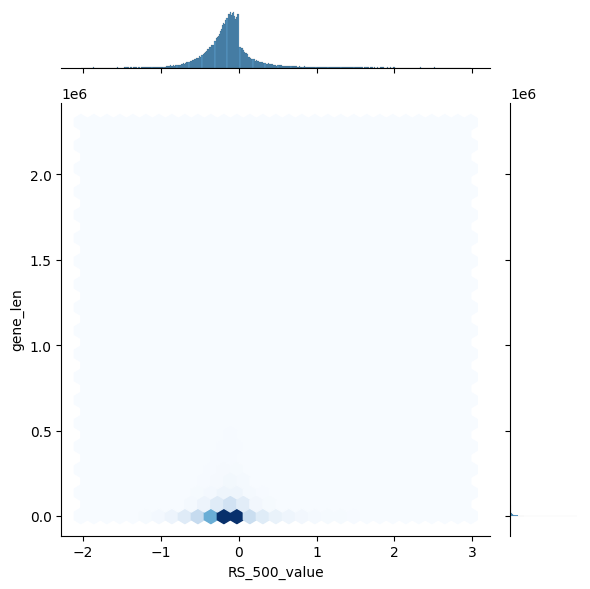

<Figure size 3000x1800 with 0 Axes>

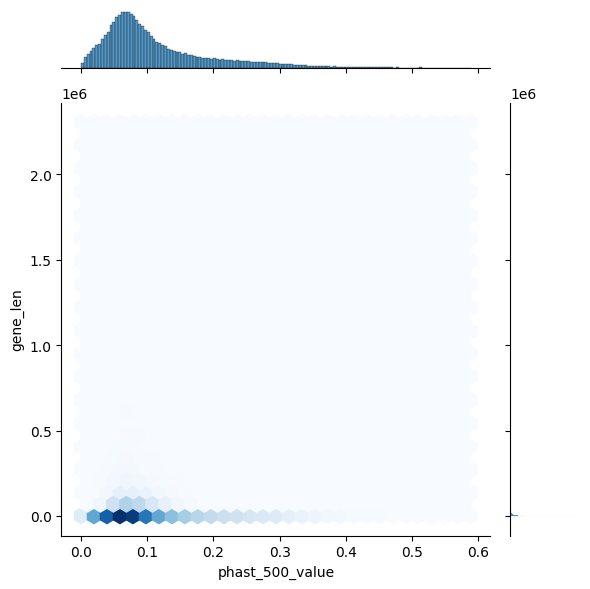

<Figure size 3000x1800 with 0 Axes>

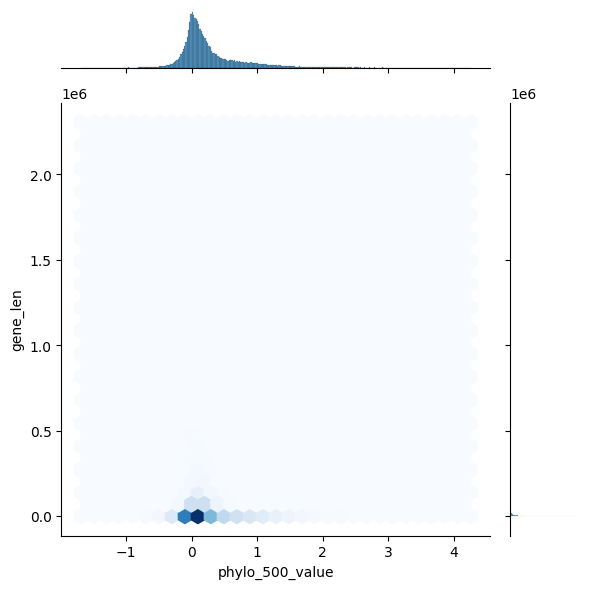

<Figure size 3000x1800 with 0 Axes>

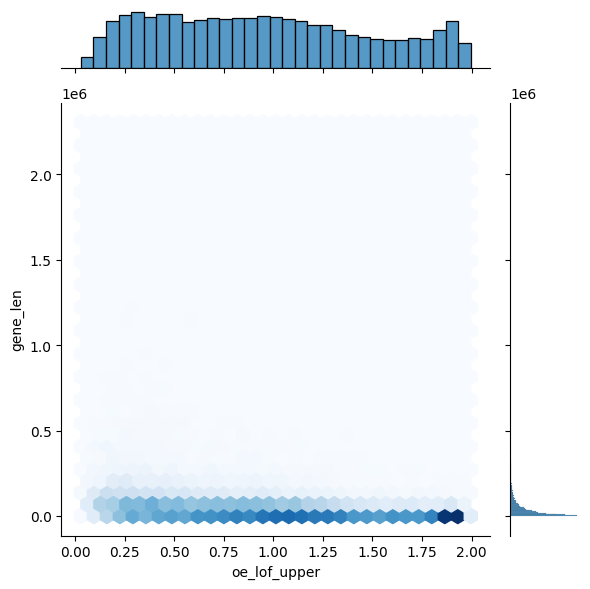

<Figure size 3000x1800 with 0 Axes>

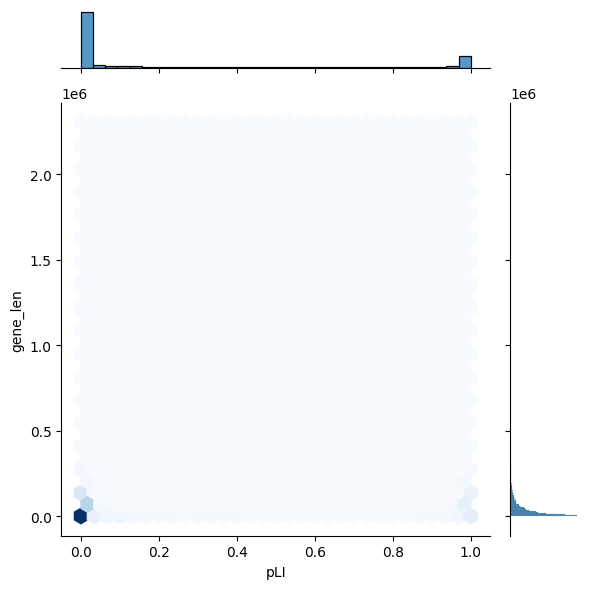

<Figure size 3000x1800 with 0 Axes>

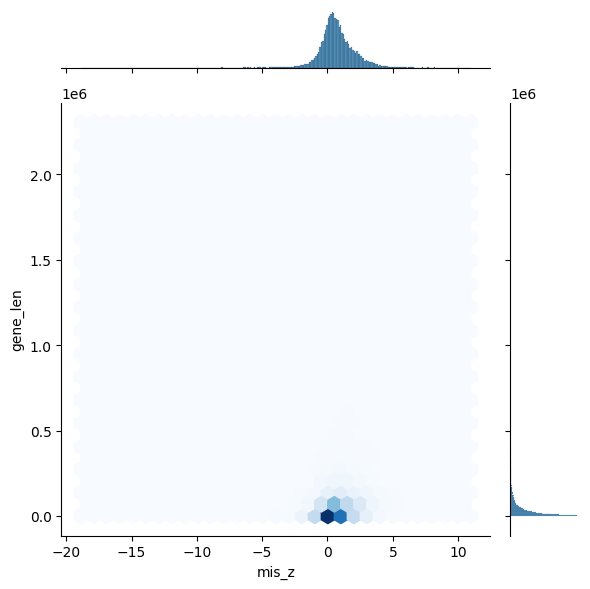

<Figure size 3000x1800 with 0 Axes>

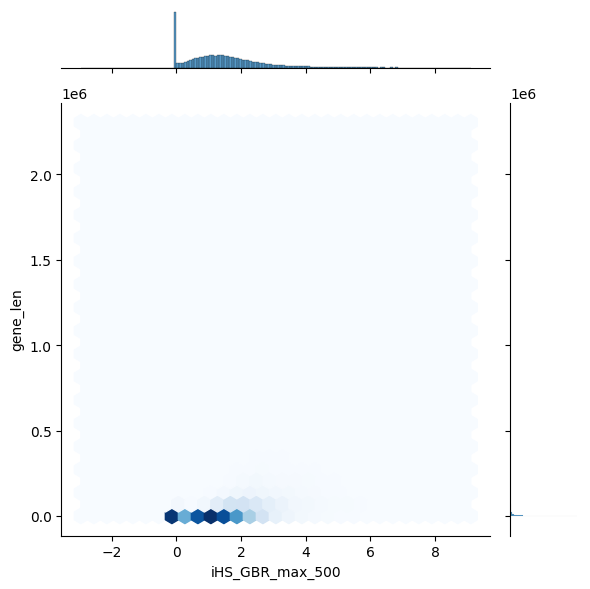

<Figure size 3000x1800 with 0 Axes>

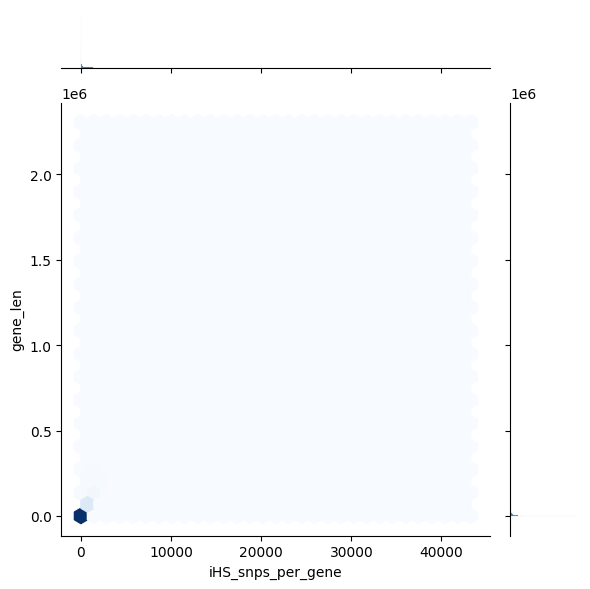

<Figure size 3000x1800 with 0 Axes>

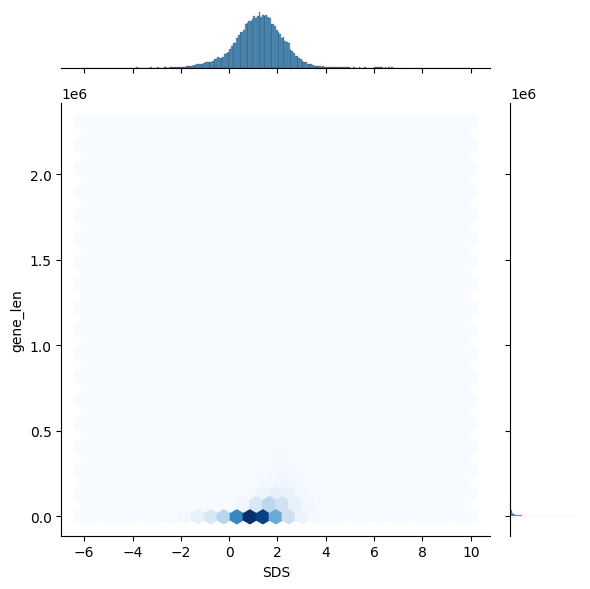

<Figure size 3000x1800 with 0 Axes>

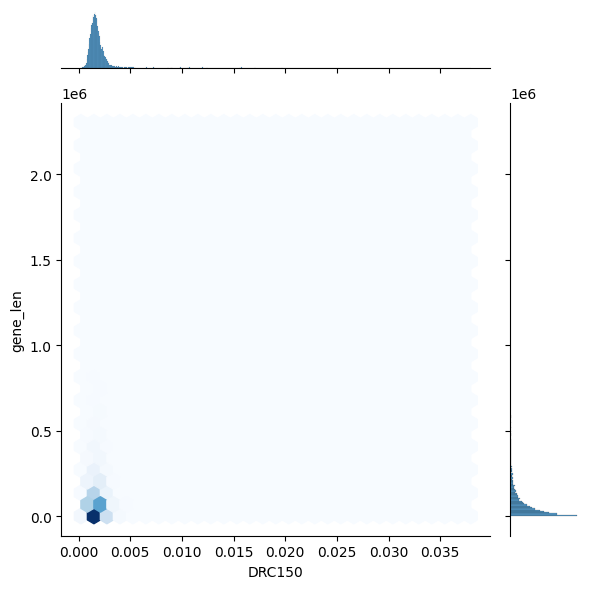

<Figure size 3000x1800 with 0 Axes>

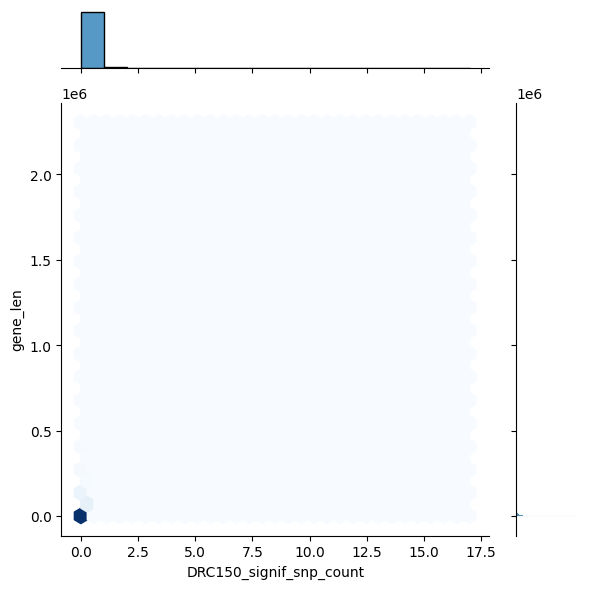

In [26]:
metrics = ['RS_500_value', 'phast_500_value', 'phylo_500_value',
           'oe_lof_upper', 'pLI', 'mis_z',
           'iHS_GBR_max_500', 'iHS_snps_per_gene', 'SDS', 'DRC150', 'DRC150_signif_snp_count']

path_to_plots = os.path.join(current_dir, '..', 'data', 'joint_plots')
os.makedirs(path_to_plots, exist_ok=True)

for metric in metrics:
    plt.figure(figsize=(10, 6), dpi=300)
    jp = sns.jointplot(
        x=metric,
        y='gene_len',
        data=df,
        kind='hex',  
        gridsize=30,
        cmap='Blues',
        height=6  
    )
    name = f'{str(metric).replace(" ", "_")}_vs_gene_len.png'  
    output = os.path.join(path_to_plots, name)
    plt.tight_layout()
    plt.savefig(output, dpi=300, bbox_inches='tight')  
    plt.show()

# GO annotation in python with `gseapy`

<Figure size 3000x1800 with 0 Axes>

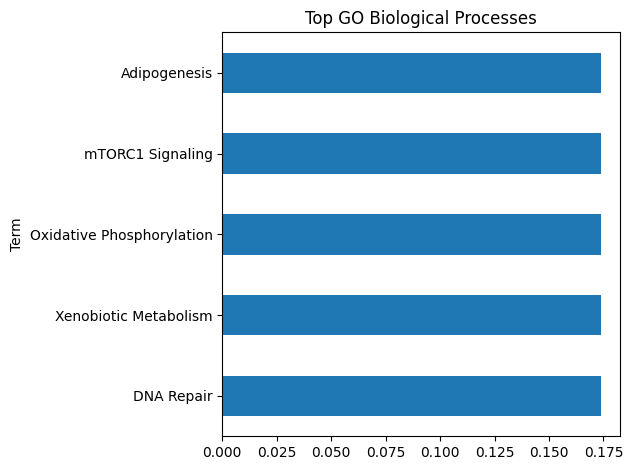

In [3]:
import gseapy as gp
#import goatools
#import bioinfokit

#example 

gene_list = ['OR3A4P',
 'OR1R1P',
 'SLC16A13',
 'POLR2A',
 'FXR2',
 'ATP1B2',
 'RHOT1',
 'RP11-227G15.2',
 'GJC1',
 'C1QL1',
 'NMT1',
 'FMNL1',
 'KANSL1',
 'SKAP1',
 'CHAD',
 'MSI2',
 'DDX5',
 'H3F3B',
 'TNRC6C']

#GO enrichment
go_results = gp.enrichr(
    gene_list=gene_list,
    gene_sets=['MSigDB_Hallmark_2020'],  #database
    organism='human',  
    cutoff=0.05 
)

go_df = go_results.results.sort_values('P-value')
#print(go_df[['Term', 'P-value', 'Adjusted P-value', 'Genes']].head(10))

#visualization for top-10 processes
plt.figure(figsize=(10, 6), dpi=300)
go_df.head(10).plot.barh(x='Term', y='Adjusted P-value', legend=False)
plt.title('Top GO Biological Processes')
plt.tight_layout()
plt.show()